In [ ]:
# Mount Google Drive to access dataset folders
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import os
from PIL import Image, ImageOps
from collections import defaultdict

DS1 = "/content/drive/MyDrive/Bacteria Paper/datasets/Micro_Organism"
IMG_EXTS = {'.jpg','.jpeg','.png','.bmp','.tif','.tiff','.webp'}

def is_image(fname):
    return os.path.splitext(fname)[1].lower() in IMG_EXTS

def convert_all_to_jpg(root, quality=95):
    """
    Recursively সব image ফাইলকে .jpg ফরম্যাটে কনভার্ট করে দেয়।
    অরিজিনাল ফাইল ডিলিট করে নতুন ফাইল রাখে।
    """
    for r, _, files in os.walk(root):
        for f in files:
            if not is_image(f):
                continue
            src_path = os.path.join(r, f)
            ext = os.path.splitext(f)[1].lower()
            if ext == ".jpg":
                continue  # আগে থেকেই JPG

            try:
                with Image.open(src_path) as im:
                    im = ImageOps.exif_transpose(im)
                    if im.mode in ("RGBA","LA"):
                        bg = Image.new("RGB", im.size, (255,255,255))
                        if im.mode == "LA": im = im.convert("RGBA")
                        bg.paste(im, mask=im.getchannel("A"))
                        im = bg
                    elif im.mode != "RGB":
                        im = im.convert("RGB")

                    dst_path = os.path.splitext(src_path)[0] + ".jpg"
                    im.save(dst_path, format="JPEG", quality=quality, optimize=True)

                # পুরানো ফাইল মুছে ফেলুন
                os.remove(src_path)
                print(f"✅ Converted: {src_path} → {dst_path}")

            except Exception as e:
                print(f"⚠️ Failed: {src_path} ({e})")

def count_formats(root):
    counts = defaultdict(int)
    for r, _, files in os.walk(root):
        for f in files:
            ext = os.path.splitext(f)[1].lower()
            counts[ext] += 1
    return dict(counts)

# --- Run ---
print("🔄 Converting all images to .jpg ...")
convert_all_to_jpg(DS1)

print("\n📊 Final format summary:")
summary = count_formats(DS1)
for ext, n in summary.items():
    print(f"  {ext}: {n}")
print("Total images:", sum(summary.values()))

🔄 Converting all images to .jpg ...
✅ Converted: /content/drive/MyDrive/Bacteria Paper/datasets/Micro_Organism/Yeast/Image_17.png → /content/drive/MyDrive/Bacteria Paper/datasets/Micro_Organism/Yeast/Image_17.jpg
✅ Converted: /content/drive/MyDrive/Bacteria Paper/datasets/Micro_Organism/Yeast/Image_20.jpeg → /content/drive/MyDrive/Bacteria Paper/datasets/Micro_Organism/Yeast/Image_20.jpg
✅ Converted: /content/drive/MyDrive/Bacteria Paper/datasets/Micro_Organism/Spiral_bacteria/Image_39.jpeg → /content/drive/MyDrive/Bacteria Paper/datasets/Micro_Organism/Spiral_bacteria/Image_39.jpg
✅ Converted: /content/drive/MyDrive/Bacteria Paper/datasets/Micro_Organism/Spiral_bacteria/image_81.png → /content/drive/MyDrive/Bacteria Paper/datasets/Micro_Organism/Spiral_bacteria/image_81.jpg
✅ Converted: /content/drive/MyDrive/Bacteria Paper/datasets/Micro_Organism/Spiral_bacteria/Image_31.jpeg → /content/drive/MyDrive/Bacteria Paper/datasets/Micro_Organism/Spiral_bacteria/Image_31.jpg
✅ Converted: /co

In [ ]:
import os
from collections import defaultdict

# === আপনার ডেটাসেটের পথ ===
DS1 = "/content/drive/MyDrive/Bacteria Paper/datasets/Micro_Organism"
DS2 = "/content/drive/MyDrive/Bacteria Paper/datasets/EMDS_5_Custom"

IMG_EXTS = {'.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff', '.webp'}

def is_image(fname):
    return os.path.splitext(fname)[1].lower() in IMG_EXTS

def count_images_by_class(root):
    """
    ImageFolder-style: root/class_name/*.*
    সাবফোল্ডার থাকলে recursive ভাবে গণনা করবে।
    রিটার্ন: total_count, dict(class_name -> count), dict(ext -> count)
    """
    per_class = defaultdict(int)
    per_ext = defaultdict(int)
    total = 0

    if not os.path.isdir(root):
        raise FileNotFoundError(f"Path not found: {root}")

    # ক্লাস নাম ধরা হচ্ছে root-এর ঠিক নিচের সাবফোল্ডার
    class_dirs = [d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))]
    if not class_dirs:
        # ক্লাস ফোল্ডার না থাকলে root-কে "_root_" হিসেবে গণ্য
        class_dirs = ["_root_"]

    for cls in class_dirs:
        base = root if cls == "_root_" else os.path.join(root, cls)
        for r, _, files in os.walk(base):
            for f in files:
                if is_image(f):
                    per_class[cls] += 1
                    per_ext[os.path.splitext(f)[1].lower()] += 1
                    total += 1
    return total, dict(sorted(per_class.items())), dict(sorted(per_ext.items()))

def pretty_print(name, total, per_class, per_ext):
    print(f"\n==== {name} ====")
    print(f"🔢 Total images: {total}")
    if len(per_class) == 1 and "_root_" in per_class:
        print("⚠️ কোনো ক্লাস ফোল্ডার পাওয়া যায়নি; সব ইমেজ এক জায়গায় আছে মনে হচ্ছে।")
    else:
        print("📂 Per-class counts:")
        for cls, n in per_class.items():
            if cls != "_root_":
                print(f"  - {cls}: {n}")
    if per_ext:
        print("🧩 By extension:")
        for ext, n in per_ext.items():
            print(f"  {ext}: {n}")

# === Run for both datasets ===
tot1, pc1, pe1 = count_images_by_class(DS1)
pretty_print("Micro_Organism", tot1, pc1, pe1)

tot2, pc2, pe2 = count_images_by_class(DS2)
pretty_print("EMDS_5_Custom", tot2, pc2, pe2)

print(f"\n📊 Combined total (both datasets): {tot1 + tot2}")


==== Micro_Organism ====
🔢 Total images: 788
📂 Per-class counts:
  - Amoeba: 72
  - Euglena: 168
  - Hydra: 76
  - Paramecium: 152
  - Rod_bacteria: 85
  - Spherical_bacteria: 86
  - Spiral_bacteria: 74
  - Yeast: 75
🧩 By extension:
  .jpg: 788

==== EMDS_5_Custom ====
🔢 Total images: 817
📂 Per-class counts:
  - Actinophrys: 39
  - Arcella: 40
  - Aspidisca: 40
  - Ceratium: 38
  - Codosiga: 39
  - Colpoda: 39
  - Epistylis: 40
  - Euglena: 37
  - Euglypha: 40
  - Gonyaulax: 38
  - Gymnodinium: 39
  - Keratella_quadrala: 40
  - Noctiluca: 38
  - Paramecium: 40
  - Phacus: 36
  - Rotifera: 40
  - Siprostomum: 37
  - Stentor: 38
  - Stylonychia: 40
  - Synchaeta: 39
  - Vorticella: 40
🧩 By extension:
  .jpg: 817

📊 Combined total (both datasets): 1605


In [ ]:
import os, io, shutil, hashlib
from PIL import Image, ImageOps
from collections import defaultdict

# ================== Paths ==================
DS1 = "/content/drive/MyDrive/Bacteria Paper/datasets/Micro_Organism"
DS2 = "/content/drive/MyDrive/Bacteria Paper/datasets/EMDS_5_Custom"
DST = "/content/drive/MyDrive/Bacteria Paper/datasets/merged_dataset"  # ✅ final merged dataset

# ================== Settings ==================
IMG_EXTS = {".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp"}
SKIP_DIR_KEYS = ('mask', 'masks', 'gt', 'ground', 'label', 'edge', 'seg')  # skip ground-truth folders
JPEG_QUALITY = 95
MIN_PAD_WIDTH = 2  # 01, 02 …; auto increases to 3 if 100+

# ================== Utils ==================
def is_image(fname: str) -> bool:
    return os.path.splitext(fname)[1].lower() in IMG_EXTS

def should_skip_dir(path: str) -> bool:
    base = os.path.basename(path).lower()
    return any(k in base for k in SKIP_DIR_KEYS)

def load_rgb_canonical(path):
    with Image.open(path) as im:
        im = ImageOps.exif_transpose(im)
        if im.mode in ("RGBA", "LA"):
            bg = Image.new("RGB", im.size, (255, 255, 255))
            if im.mode == "LA":
                im = im.convert("RGBA")
            bg.paste(im, mask=im.getchannel("A"))
            im = bg
        elif im.mode != "RGB":
            im = im.convert("RGB")
        return im

def to_canonical_jpeg_bytes(pil_img, quality=JPEG_QUALITY) -> bytes:
    buf = io.BytesIO()
    pil_img.save(buf, format="JPEG", quality=quality, optimize=True)
    return buf.getvalue()

def md5(b: bytes) -> str:
    h = hashlib.md5(); h.update(b); return h.hexdigest()

def list_classes(root):
    if not os.path.isdir(root):
        return set()
    return {d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))}

def iter_image_files(class_root):
    for r, dnames, fnames in os.walk(class_root):
        if should_skip_dir(r):
            continue
        for f in fnames:
            if is_image(f):
                yield os.path.join(r, f)

def gather_unique_jpegs_for_class(cls_name, sources):
    seen_hashes = set()
    unique_bytes = []
    for ds_root in sources:
        if not ds_root: continue
        cls_path = os.path.join(ds_root, cls_name)
        if not os.path.isdir(cls_path): continue

        for fp in iter_image_files(cls_path):
            try:
                pil = load_rgb_canonical(fp)
                jb = to_canonical_jpeg_bytes(pil, quality=JPEG_QUALITY)
                h = md5(jb)
                if h in seen_hashes:
                    continue
                seen_hashes.add(h)
                unique_bytes.append(jb)
            except Exception as e:
                print(f"⚠️ Skipping unreadable: {fp} ({e})")
    return unique_bytes

def write_numbered_jpegs(dst_class_dir, jpeg_bytes_list, min_pad=MIN_PAD_WIDTH):
    if os.path.exists(dst_class_dir):
        shutil.rmtree(dst_class_dir)
    os.makedirs(dst_class_dir, exist_ok=True)

    n = len(jpeg_bytes_list)
    if n == 0: return 0

    pad = max(min_pad, len(str(n)))
    for i, jb in enumerate(jpeg_bytes_list, start=1):
        out = os.path.join(dst_class_dir, f"{i:0{pad}d}.jpg")
        with open(out, "wb") as f:
            f.write(jb)
    return n

def count_jpgs(root):
    total = 0
    per_class = {}
    for cls in sorted(list_classes(root)):
        cls_dir = os.path.join(root, cls)
        n = sum(1 for f in os.listdir(cls_dir)
                if os.path.isfile(os.path.join(cls_dir, f)) and f.lower().endswith(".jpg"))
        total += n
        per_class[cls] = n
    return total, per_class

# ================== Merge ==================
def merge_datasets(ds1, ds2, dst):
    # ✅ Create destination folder if not exists
    if not os.path.exists(dst):
        os.makedirs(dst, exist_ok=True)

    classes = sorted(list(list_classes(ds1) | list_classes(ds2)))
    if not classes:
        raise RuntimeError("No class folders found in DS1 or DS2.")

    print(f"Found {len(classes)} classes.")
    grand_total = 0
    report = defaultdict(int)

    for cls in classes:
        print(f"\n▶ Merging class: {cls}")
        jb_list = gather_unique_jpegs_for_class(cls, [ds1, ds2])
        dst_class = os.path.join(dst, cls)
        kept = write_numbered_jpegs(dst_class, jb_list, min_pad=MIN_PAD_WIDTH)
        grand_total += kept
        report[cls] = kept
        print(f"   Saved {kept} images → {dst_class}")

    print("\n===== Merge Summary =====")
    for cls in sorted(report):
        print(f"  - {cls}: {report[cls]} JPG")
    print(f"🔢 Total JPG images (merged): {grand_total}")

# ================== Run ==================
if __name__ == "__main__":
    print(f"Merging:\n  DS1 = {DS1}\n  DS2 = {DS2}\n→ DST = {DST}")
    merge_datasets(DS1, DS2, DST)

    tot, per = count_jpgs(DST)
    print("\nVerification (final counts):")
    for cls, n in per.items():
        print(f"  - {cls}: {n}")
    print("Total:", tot)

Merging:
  DS1 = /content/drive/MyDrive/Bacteria Paper/datasets/Micro_Organism
  DS2 = /content/drive/MyDrive/Bacteria Paper/datasets/EMDS_5_Custom
→ DST = /content/drive/MyDrive/Bacteria Paper/datasets/merged_dataset
Found 27 classes.

▶ Merging class: Actinophrys
   Saved 39 images → /content/drive/MyDrive/Bacteria Paper/datasets/merged_dataset/Actinophrys

▶ Merging class: Amoeba
   Saved 69 images → /content/drive/MyDrive/Bacteria Paper/datasets/merged_dataset/Amoeba

▶ Merging class: Arcella
   Saved 40 images → /content/drive/MyDrive/Bacteria Paper/datasets/merged_dataset/Arcella

▶ Merging class: Aspidisca
   Saved 40 images → /content/drive/MyDrive/Bacteria Paper/datasets/merged_dataset/Aspidisca

▶ Merging class: Ceratium
   Saved 38 images → /content/drive/MyDrive/Bacteria Paper/datasets/merged_dataset/Ceratium

▶ Merging class: Codosiga
   Saved 39 images → /content/drive/MyDrive/Bacteria Paper/datasets/merged_dataset/Codosiga

▶ Merging class: Colpoda
   Saved 39 images → /

Using merged dataset from: /content/drive/MyDrive/Bacteria Paper/datasets/merged_dataset


/tmp/ipython-input-1769548452.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  mpl.cm.get_cmap('tab20', 20),
/tmp/ipython-input-1769548452.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  mpl.cm.get_cmap('tab20b', 20),
/tmp/ipython-input-1769548452.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  mpl.cm.get_cmap('tab20c', 20),


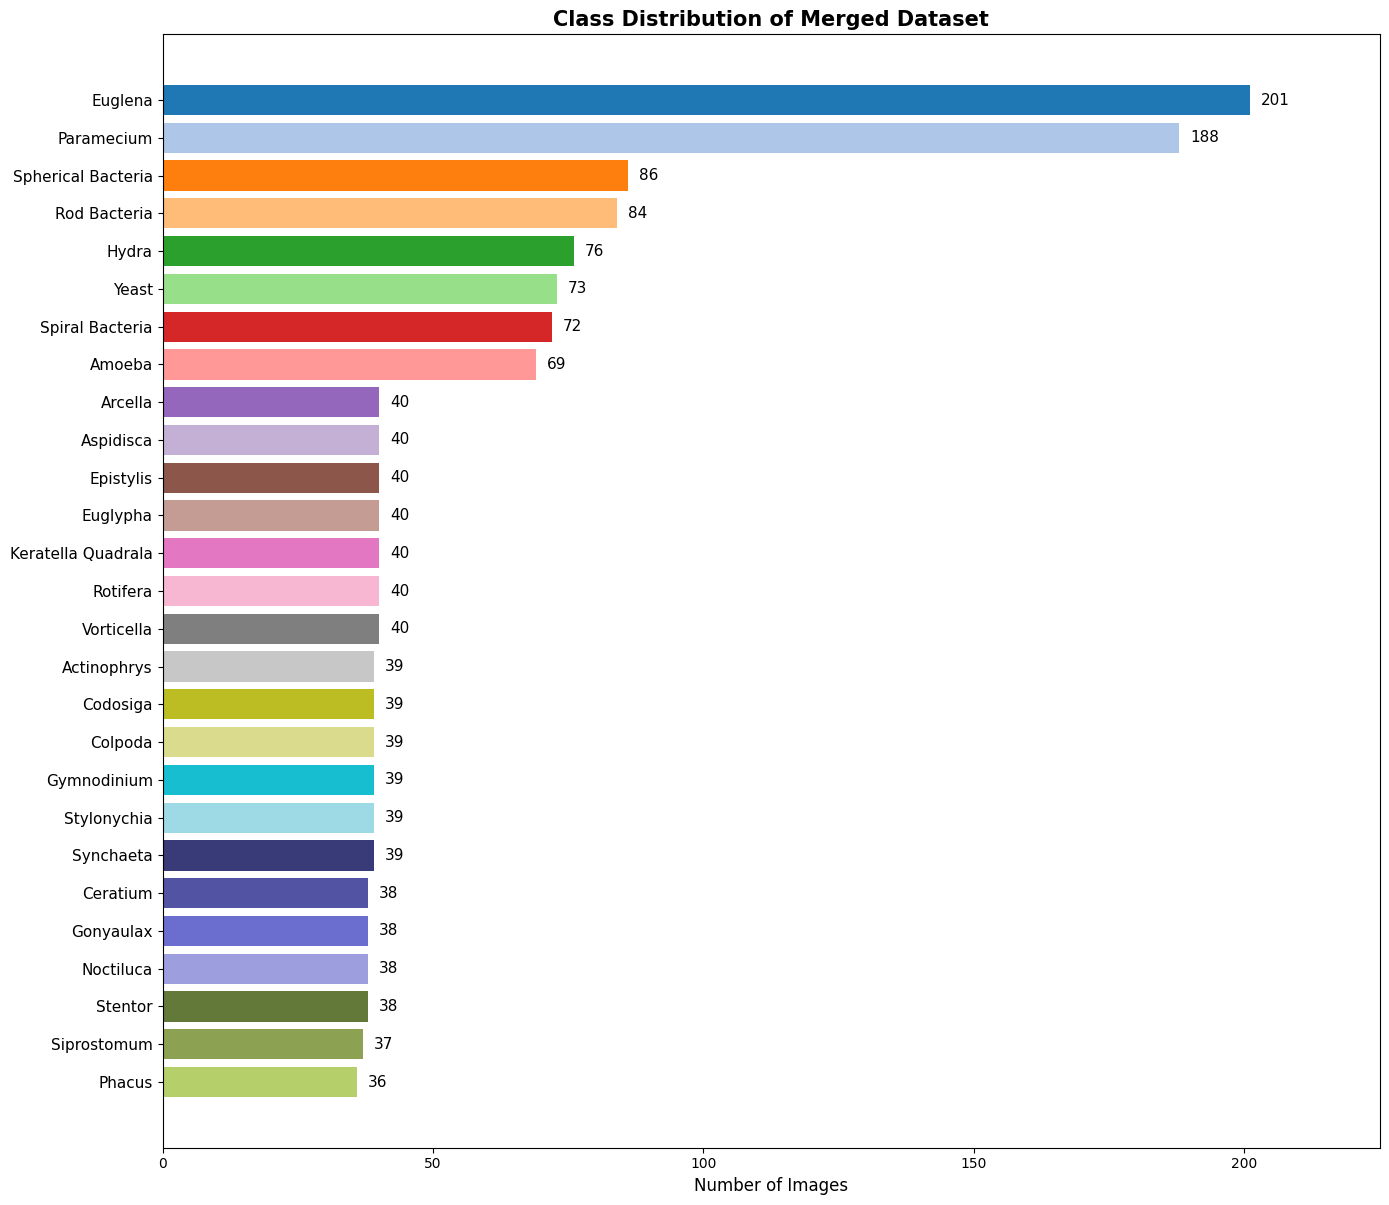

Total classes: 27
Total images: 1588
Saved plot to: /content/drive/MyDrive/Bacteria Paper/datasets/merged_dataset/class_distribution_readable.png


In [ ]:
# ==== Class distribution after merge (readable labels + distinct colors) ====
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# --- your merged dataset path (fixed) ---
DST = "/content/drive/MyDrive/Bacteria Paper/datasets/merged_dataset"
merged_dir = DST

if not os.path.isdir(merged_dir):
    raise FileNotFoundError(f"Merged dataset folder not found at: {merged_dir}")

print("Using merged dataset from:", merged_dir)

def pretty_name(s):
    # underscores/dashes -> space, Title Case
    return s.replace('_', ' ').replace('-', ' ').strip().title()

# ---- collect counts from immediate subfolders (class-wise) ----
IMG_EXTS = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff', '.webp')
class_counts = {}

for cls in sorted(os.listdir(merged_dir)):
    p = os.path.join(merged_dir, cls)
    if not os.path.isdir(p):
        continue
    n = 0
    # count only files in this class folder (non-recursive)
    for f in os.listdir(p):
        if f.lower().endswith(IMG_EXTS) and os.path.isfile(os.path.join(p, f)):
            n += 1
    if n > 0:
        class_counts[cls] = n

# ---- nothing to plot? ----
if not class_counts:
    print("No images found under class folders in:", merged_dir)
else:
    # sort by count (desc)
    items = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
    raw_names  = [k for k, _ in items]
    disp_names = [pretty_name(k) for k, _ in items]
    counts     = [v for _, v in items]
    n = len(disp_names)

    # ---- build a robust color palette with many distinct colors
    cmaps = [
        mpl.cm.get_cmap('tab20', 20),
        mpl.cm.get_cmap('tab20b', 20),
        mpl.cm.get_cmap('tab20c', 20),
    ]
    colors = np.vstack([c(np.arange(c.N))[:, :3] for c in cmaps])  # RGB only
    if n > colors.shape[0]:
        extra = mpl.cm.get_cmap('hsv', n - colors.shape[0])(np.arange(n - colors.shape[0]))[:, :3]
        colors = np.vstack([colors, extra])
    colors = colors[:n]

    # ---- plot (horizontal bars for readability)
    fig_h = max(6, 0.45 * n)  # scale height with number of classes
    plt.figure(figsize=(14, fig_h))

    ypos = np.arange(n)
    bars = plt.barh(ypos, counts, color=colors, edgecolor='none')

    # counts at end of bar
    max_count = max(counts) if counts else 1
    for i, b in enumerate(bars):
        w = b.get_width()
        plt.text(w + max_count * 0.01, b.get_y() + b.get_height()/2,
                 f"{counts[i]}", va='center', fontsize=11)

    # labels, titles, layout
    plt.yticks(ypos, disp_names, fontsize=11)
    plt.gca().invert_yaxis()  # largest on top
    plt.xlabel("Number of Images", fontsize=12)
    plt.title("Class Distribution of Merged Dataset", fontsize=15, weight='bold')

    # add some padding on the right so numbers don't get cut off
    plt.xlim(0, max_count * 1.12)

    plt.tight_layout()
    save_path = os.path.join(merged_dir, "class_distribution_readable.png")
    plt.savefig(save_path, dpi=250, bbox_inches='tight')
    plt.show()

    # console summary
    print("Total classes:", n)
    print("Total images:", sum(counts))
    print("Saved plot to:", save_path)


In [ ]:
# Install dependency for perceptual hashing
!pip install -q ImageHash

import os
import shutil
import uuid
import cv2
from PIL import Image
import imagehash

# ==== Use your merged dataset path (fixed) ====
DST = "/content/drive/MyDrive/Bacteria Paper/datasets/merged_dataset"
merged_dir = DST

if not os.path.isdir(merged_dir):
    raise FileNotFoundError(f"Merged dataset folder not found at: {merged_dir}")

print("Using merged dataset from:", merged_dir)

# Consider these as image files
IMG_EXTS = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff', '.webp')

# ==== Show total images before cleaning ====
def count_total_images(root):
    total_images = 0
    for cls in sorted(os.listdir(root)):
        cls_path = os.path.join(root, cls)
        if not os.path.isdir(cls_path):
            continue
        total_images += len([f for f in os.listdir(cls_path)
                             if os.path.isfile(os.path.join(cls_path, f)) and
                             f.lower().endswith(IMG_EXTS)])
    return total_images

total_images_before_cleaning = count_total_images(merged_dir)
print("Total images before cleaning:", total_images_before_cleaning)

# ==== Remove near-duplicates using pHash Hamming distance threshold ====
def remove_near_duplicates(root, thresh=6):
    """
    For each class folder:
      - compute perceptual hash (pHash) for each image
      - if any previously kept hash differs by <= thresh (Hamming distance), treat as near-duplicate and remove
    Returns: number of removed files
    """
    removed = 0
    for cls in sorted(os.listdir(root)):
        cls_path = os.path.join(root, cls)
        if not os.path.isdir(cls_path):
            continue

        kept_hashes = []  # list[imagehash.ImageHash]
        for fn in list(os.listdir(cls_path)):
            fp = os.path.join(cls_path, fn)
            if not os.path.isfile(fp):
                continue
            if not fn.lower().endswith(IMG_EXTS):
                # non-image (or leftover) -> try remove
                try:
                    os.remove(fp); removed += 1
                except:
                    pass
                continue
            try:
                with Image.open(fp) as im:
                    im = im.convert("RGB")
                    h = imagehash.phash(im)
                # near-dup if any existing hash is within threshold
                if any((h - kh) <= thresh for kh in kept_hashes):
                    os.remove(fp); removed += 1
                else:
                    kept_hashes.append(h)
            except:
                # unreadable/corrupted file -> remove
                try:
                    os.remove(fp); removed += 1
                except:
                    pass
    return removed

removed_dups = remove_near_duplicates(merged_dir, thresh=6)
print(f"Removed near-duplicates: {removed_dups}")

# ==== Remove blurry images by variance of Laplacian ====
def remove_blurry(root, blurry_threshold=100.0):
    """
    Removes images whose Laplacian variance (focus measure) is below threshold.
    Returns: number of removed files
    """
    removed = 0
    for cls in sorted(os.listdir(root)):
        cls_path = os.path.join(root, cls)
        if not os.path.isdir(cls_path):
            continue
        for fn in list(os.listdir(cls_path)):
            fp = os.path.join(cls_path, fn)
            if not os.path.isfile(fp):
                continue
            if not fn.lower().endswith(IMG_EXTS):
                continue
            try:
                img = cv2.imread(fp)
                if img is None:
                    os.remove(fp); removed += 1; continue
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                var = cv2.Laplacian(gray, cv2.CV_64F).var()
                if var < blurry_threshold:
                    os.remove(fp); removed += 1
            except:
                try:
                    os.remove(fp); removed += 1
                except:
                    pass
    return removed

removed_blur = remove_blurry(merged_dir, blurry_threshold=100.0)
print(f"Removed blurry: {removed_blur}")

# ==== Recount after cleaning (per class + total) ====
class_counts_clean = {}
for cls in sorted(os.listdir(merged_dir)):
    p = os.path.join(merged_dir, cls)
    if os.path.isdir(p):
        n = len([f for f in os.listdir(p)
                 if f.lower().endswith(IMG_EXTS) and os.path.isfile(os.path.join(p, f))])
        if n > 0:
            class_counts_clean[cls] = n

total_images_after_cleaning = sum(class_counts_clean.values())
print("Class counts after cleaning:", class_counts_clean)
print("Total images after cleaning:", total_images_after_cleaning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 4.9 MB/s eta 0:00:00
Using merged dataset from: /content/drive/MyDrive/Bacteria Paper/datasets/merged_dataset
Total images before cleaning: 1588
Removed near-duplicates: 40
Removed blurry: 437
Class counts after cleaning: {'Actinophrys': 24, 'Amoeba': 48, 'Arcella': 21, 'Aspidisca': 20, 'Ceratium': 32, 'Codosiga': 21, 'Colpoda': 27, 'Epistylis': 27, 'Euglena': 131, 'Euglypha': 12, 'Gonyaulax': 24, 'Gymnodinium': 20, 'Hydra': 44, 'Keratella_quadrala': 36, 'Noctiluca': 36, 'Paramecium': 146, 'Phacus': 15, 'Rod_bacteria': 68, 'Rotifera': 32, 'Siprostomum': 30, 'Spherical_bacteria': 72, 'Spiral_bacteria': 58, 'Stentor': 36, 'Stylonychia': 21, 'Synchaeta': 38, 'Vorticella': 15, 'Yeast': 57}
Total images after cleaning: 1111


In [ ]:
import os, shutil, random
from collections import defaultdict

# ====== Paths (edit only if you want a different output root) ======
DST = "/content/drive/MyDrive/Bacteria Paper/datasets/merged_dataset"   # source (classes as subfolders)
OUT_ROOT = "/content/drive/MyDrive/Bacteria Paper/datasets/Processed"   # destination root
TRAIN_DIR = os.path.join(OUT_ROOT, "train")
TEST_DIR  = os.path.join(OUT_ROOT, "test")

# ====== Split config ======
TEST_SIZE = 0.20           # Test = 20%, Train+Val = 80%
SEED = 42                  # for reproducibility
IMG_EXTS = {'.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff', '.webp'}
CLEAR_DEST = True          # delete OUT_ROOT/train and OUT_ROOT/test before writing

random.seed(SEED)

def is_image(fname):
    return os.path.splitext(fname)[1].lower() in IMG_EXTS

def list_class_files(root):
    """Return dict: class_name -> [absolute image paths]"""
    classes = [d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))]
    data = {}
    for cls in sorted(classes):
        cls_dir = os.path.join(root, cls)
        files = [os.path.join(cls_dir, f) for f in os.listdir(cls_dir)
                 if os.path.isfile(os.path.join(cls_dir, f)) and is_image(f)]
        if files:
            data[cls] = sorted(files)
    if not data:
        raise RuntimeError(f"No class folders with images found under: {root}")
    return data

def safe_mkdir(p, clear=False):
    if clear and os.path.isdir(p):
        shutil.rmtree(p)
    os.makedirs(p, exist_ok=True)

def stratified_split_per_class(files, test_size=TEST_SIZE):
    """
    Return train_list, test_list with robust rounding for small classes:
      - if n==1 -> all train
      - if n in [2..4] -> test = 1
      - else -> test = round(n * test_size), min 1, max n-1
    """
    n = len(files)
    idx = list(range(n))
    random.shuffle(idx)

    if n == 1:
        ttest = 0
    elif 2 <= n <= 4:
        ttest = 1
    else:
        ttest = max(1, min(n-1, int(round(n * test_size))))

    test_idx = set(idx[:ttest])
    test_files  = [files[i] for i in range(n) if i in test_idx]
    train_files = [files[i] for i in range(n) if i not in test_idx]
    return train_files, test_files

def copy_files(file_list, dst_dir):
    os.makedirs(dst_dir, exist_ok=True)
    for src in file_list:
        basename = os.path.basename(src)
        # keep original filename; if you prefer sequential naming, you can rename here
        shutil.copy2(src, os.path.join(dst_dir, basename))

def count_dir_images(root):
    total = 0
    per_class = {}
    for cls in sorted(d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))):
        cls_dir = os.path.join(root, cls)
        n = sum(1 for f in os.listdir(cls_dir)
                if os.path.isfile(os.path.join(cls_dir, f)) and is_image(f))
        per_class[cls] = n
        total += n
    return total, per_class

# ====== Run ======
# Load source data
data = list_class_files(DST)

# Prepare destination
safe_mkdir(OUT_ROOT, clear=False)
safe_mkdir(TRAIN_DIR, clear=CLEAR_DEST)
safe_mkdir(TEST_DIR,  clear=CLEAR_DEST)

# Split & copy
summary = defaultdict(lambda: {"train":0, "test":0})
for cls, files in data.items():
    tr, te = stratified_split_per_class(files, TEST_SIZE)
    copy_files(tr, os.path.join(TRAIN_DIR, cls))
    copy_files(te, os.path.join(TEST_DIR,  cls))
    summary[cls]["train"] = len(tr)
    summary[cls]["test"]  = len(te)

# Report
train_total, train_per = count_dir_images(TRAIN_DIR)
test_total,  test_per  = count_dir_images(TEST_DIR)

print("\n===== Split Summary (per class) =====")
for cls in sorted(summary):
    print(f"  - {cls}: train {summary[cls]['train']:4d} | test {summary[cls]['test']:4d}")

print("\n===== Totals =====")
print(f"Train images: {train_total}")
print(f"Test  images: {test_total}")
print(f"All (train+test): {train_total + test_total}")

# Optional: quick sanity check that totals match source
src_total = sum(len(v) for v in data.values())
if (train_total + test_total) != src_total:
    print(f"⚠️ Mismatch: source={src_total}, written={train_total + test_total} (check file filters/extensions)")
else:
    print("✅ Split complete and totals match source.")




===== Split Summary (per class) =====
  - Actinophrys: train   19 | test    5
  - Amoeba: train   38 | test   10
  - Arcella: train   17 | test    4
  - Aspidisca: train   16 | test    4
  - Ceratium: train   26 | test    6
  - Codosiga: train   17 | test    4
  - Colpoda: train   22 | test    5
  - Epistylis: train   22 | test    5
  - Euglena: train  105 | test   26
  - Euglypha: train   10 | test    2
  - Gonyaulax: train   19 | test    5
  - Gymnodinium: train   16 | test    4
  - Hydra: train   35 | test    9
  - Keratella_quadrala: train   29 | test    7
  - Noctiluca: train   29 | test    7
  - Paramecium: train  117 | test   29
  - Phacus: train   12 | test    3
  - Rod_bacteria: train   54 | test   14
  - Rotifera: train   26 | test    6
  - Siprostomum: train   24 | test    6
  - Spherical_bacteria: train   58 | test   14
  - Spiral_bacteria: train   46 | test   12
  - Stentor: train   29 | test    7
  - Stylonychia: train   17 | test    4
  - Synchaeta: train   30 | test   

In [ ]:
import os
import numpy as np
from PIL import Image, ImageEnhance
from tqdm import tqdm

# --- settings ---
SRC_DIR = "/content/drive/MyDrive/Bacteria Paper/datasets/Processed/train"      # your current train dir
DST_DIR = "/content/drive/MyDrive/Bacteria Paper/datasets/Processed/train_320"  # NEW output dir (will be created)
IMAGE_SIZE = (320, 320)
VALID_EXTS = {".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp"}

def is_image(fname):
    return os.path.splitext(fname.lower())[1] in VALID_EXTS

def calculate_mean_std(image_dir, image_size=IMAGE_SIZE):
    """
    Compute dataset mean/std AFTER a deterministic resize to image_size.
    Returns mean, std as 3-element numpy arrays in 0..1 scale (RGB).
    """
    channel_sum = np.zeros(3, dtype=np.float64)
    channel_sqsum = np.zeros(3, dtype=np.float64)
    pixel_count = 0

    class_names = [d for d in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, d))]
    for cls in class_names:
        class_path = os.path.join(image_dir, cls)
        files = [f for f in os.listdir(class_path) if is_image(f)]
        for img_name in tqdm(files, desc=f"Calculating stats in {cls}"):
            img_path = os.path.join(class_path, img_name)
            try:
                img = Image.open(img_path).convert("RGB").resize(image_size, resample=Image.BICUBIC)
                arr = np.asarray(img, dtype=np.float32) / 255.0   # [H, W, 3]
                h, w, _ = arr.shape
                pixel_count += h * w
                channel_sum += arr.reshape(-1, 3).sum(axis=0)
                channel_sqsum += (arr.reshape(-1, 3) ** 2).sum(axis=0)
            except Exception as e:
                print(f"Skipping {img_path}: {e}")

    mean = channel_sum / pixel_count
    var = channel_sqsum / pixel_count - mean**2
    std = np.sqrt(np.maximum(var, 1e-12))
    return mean, std

def preprocess_training_images(src_dir, dst_dir, image_size=IMAGE_SIZE,
                               sharpness=1.5, contrast=1.2):
    """
    Resize to image_size and gently enhance sharpness/contrast.
    Writes results to dst_dir, preserving class subfolders and filenames.
    NO normalization on-disk (normalize in training transforms).
    """
    os.makedirs(dst_dir, exist_ok=True)
    class_names = [d for d in os.listdir(src_dir) if os.path.isdir(os.path.join(src_dir, d))]
    for cls in class_names:
        src_cls = os.path.join(src_dir, cls)
        dst_cls = os.path.join(dst_dir, cls)
        os.makedirs(dst_cls, exist_ok=True)

        files = [f for f in os.listdir(src_cls) if is_image(f)]
        for img_name in tqdm(files, desc=f"Preprocessing {cls}"):
            src_path = os.path.join(src_cls, img_name)
            dst_path = os.path.join(dst_cls, img_name)
            try:
                image = Image.open(src_path).convert("RGB")
                # resize first (bicubic)
                image = image.resize(image_size, resample=Image.BICUBIC)
                # gentle enhancements (same as your script)
                image = ImageEnhance.Sharpness(image).enhance(sharpness)
                image = ImageEnhance.Contrast(image).enhance(contrast)
                image.save(dst_path)  # write processed file
            except Exception as e:
                print(f"Error processing {src_path}: {e}")

# 1) compute mean/std at 320x320 on your ORIGINAL train dir
mean, std = calculate_mean_std(SRC_DIR, image_size=IMAGE_SIZE)
print("✅ Dataset Mean @320:", mean)
print("✅ Dataset Std  @320:", std)

# 2) write resized/enhanced images to a new train_320 dir
preprocess_training_images(SRC_DIR, DST_DIR, image_size=IMAGE_SIZE)
print(f"✅ Preprocessing completed: {DST_DIR}")

Calculating stats in Yeast: 100%|██████████| 46/46 [00:00<00:00, 48.25it/s]


✅ Dataset Mean @320: [0.54200659 0.57473042 0.55953813]
✅ Dataset Std  @320: [0.2644171  0.25311802 0.26218295]


Preprocessing Yeast: 100%|██████████| 46/46 [00:01<00:00, 27.32it/s]

✅ Preprocessing completed: /content/drive/MyDrive/Bacteria Paper/datasets/Processed/train_320


In [ ]:
import os
from PIL import Image
from tqdm import tqdm

SRC_DIR = "/content/drive/MyDrive/Bacteria Paper/datasets/Processed/test"
DST_DIR = "/content/drive/MyDrive/Bacteria Paper/datasets/Processed/test_320"
IMAGE_SIZE = (320, 320)

VALID_EXTS = {".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp"}
def is_image(fname): return os.path.splitext(fname.lower())[1] in VALID_EXTS

os.makedirs(DST_DIR, exist_ok=True)
classes = [d for d in os.listdir(SRC_DIR) if os.path.isdir(os.path.join(SRC_DIR, d))]

for cls in classes:
    src_cls = os.path.join(SRC_DIR, cls)
    dst_cls = os.path.join(DST_DIR, cls)
    os.makedirs(dst_cls, exist_ok=True)

    files = [f for f in os.listdir(src_cls) if is_image(f)]
    for img_name in tqdm(files, desc=f"Resizing {cls}"):
        src_path = os.path.join(src_cls, img_name)
        dst_path = os.path.join(dst_cls, img_name)
        try:
            img = Image.open(src_path).convert("RGB")
            img = img.resize(IMAGE_SIZE, resample=Image.BICUBIC)
            img.save(dst_path)
        except Exception as e:
            print(f"Error processing {src_path}: {e}")

print(f"✅ Test images written to {DST_DIR} at 320×320.")


Resizing Yeast: 100%|██████████| 11/11 [00:00<00:00, 26.17it/s]

✅ Test images written to /content/drive/MyDrive/Bacteria Paper/datasets/Processed/test_320 at 320×320.


In [ ]:
# ===================== ResNet50 + K-Fold + Albumentations "Smart Aug" (no MixUp/CutMix) =====================
import os, time, random, numpy as np, torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, models
from torchvision.models import ResNet50_Weights
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold
from PIL import Image
from torchvision.transforms.functional import to_tensor

# Albumentations
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2  # for border_mode constants

# ---------- Paths ----------
train_dir = "/content/drive/MyDrive/Bacteria Paper/datasets/Processed/train_320"
test_dir  = "/content/drive/MyDrive/Bacteria Paper/datasets/Processed/test_320"

# ---------- Your dataset mean/std (0–1 scale; RGB) ----------
DATA_MEAN = [0.54200659, 0.57473042, 0.55953813]   # <-- REPLACE with your computed values
DATA_STD  = [0.2644171,  0.25311802, 0.26218295]   # <-- REPLACE with your computed values

# ---------- Config ----------
SEED = 42
IMG_SIZE = 320              # try 288 or 320 if VRAM allows
N_SPLITS = 5
EPOCHS = 60
PATIENCE = 15

HEAD_WARMUP_EPOCHS   = 6     # train only FC head initially
UNFREEZE_LAYER4_EPOCH = 7    # unfreeze layer4
UNFREEZE_L34_EPOCH    = 18   # unfreeze layer3+4

LR_HEAD = 1e-3
LR_BB   = 3e-4
WEIGHT_DECAY = 5e-5
BATCH_GPU, BATCH_CPU = 64, 16
NUM_WORKERS = min(8, os.cpu_count() or 2)

# Smart aug knobs
ROT_LIMIT = 20            # gentle rotation
HFLIP_P   = 0.5
VFLIP_P   = 0.2
CLAHE_P   = 0.2
GBLUR_P   = 0.25
MBLUR_P   = 0.15
GAMMA_P   = 0.3
HSV_P     = 0.3
RRC_SCALE = (0.85, 1.0)   # RandomResizedCrop-like zoom range
RRC_RATIO = (0.9, 1.1)

# ---------- Seed & Device ----------
def set_seed(s):
    random.seed(s); np.random.seed(s); torch.manual_seed(s); torch.cuda.manual_seed_all(s)
set_seed(SEED)
torch.backends.cudnn.benchmark = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ---------- Albumentations pipelines (version-proof) ----------
print("Albumentations version:", A.__version__)  # for visibility

_first_train = []
try:
    # Validate signature once; if it errors we will fallback
    _ = A.RandomResizedCrop(height=IMG_SIZE, width=IMG_SIZE, scale=RRC_SCALE, ratio=RRC_RATIO, p=1.0)
    _first_train.append(
        A.RandomResizedCrop(height=IMG_SIZE, width=IMG_SIZE, scale=RRC_SCALE, ratio=RRC_RATIO, p=1.0)
    )
except Exception as e:
    print("[WARN] RandomResizedCrop not usable in this Albumentations build. "
          "Using Resize+RandomCrop fallback. Error:", e)
    _first_train += [
        A.Resize(height=int(IMG_SIZE * 1.15), width=int(IMG_SIZE * 1.15)),
        A.RandomCrop(height=IMG_SIZE, width=IMG_SIZE),
    ]

train_aug = A.Compose(
    _first_train + [
        A.HorizontalFlip(p=HFLIP_P),
        A.VerticalFlip(p=VFLIP_P),
        A.Rotate(limit=ROT_LIMIT, p=0.5, border_mode=cv2.BORDER_REFLECT_101),
        A.RandomBrightnessContrast(p=0.5),
        A.RandomGamma(p=GAMMA_P),
        A.HueSaturationValue(p=HSV_P),
        A.GaussianBlur(blur_limit=(3, 5), p=GBLUR_P),
        A.MotionBlur(blur_limit=5, p=MBLUR_P),
        A.CLAHE(p=CLAHE_P),
        A.Normalize(mean=DATA_MEAN, std=DATA_STD),
        ToTensorV2(),
    ]
)

val_aug = A.Compose([
    A.Resize(height=int(IMG_SIZE * 1.15), width=int(IMG_SIZE * 1.15)),
    A.CenterCrop(height=IMG_SIZE, width=IMG_SIZE),
    A.Normalize(mean=DATA_MEAN, std=DATA_STD),
    ToTensorV2(),
])

# ---------- Dataset wrapper using Albumentations ----------
class AlbDataset(Dataset):
    def __init__(self, base, indices=None, transform=None):
        self.base = base
        self.samples = base.samples
        self.indices = list(indices) if indices is not None else list(range(len(self.samples)))
        self.targets = np.array([self.base.targets[i] for i in self.indices], dtype=np.int64)
        self.transform = transform
    def __len__(self): return len(self.indices)
    def __getitem__(self, i):
        idx = self.indices[i]
        path, label = self.samples[idx]
        img = np.array(Image.open(path).convert("RGB"))
        if self.transform:
            img = self.transform(image=img)["image"]
        else:
            img = to_tensor(Image.fromarray(img)).float()
        return img, label

# ---------- Data ----------
base_full = datasets.ImageFolder(root=train_dir, transform=None)
class_names = base_full.classes
num_classes = len(class_names)
all_targets = np.array(base_full.targets, dtype=np.int64)
print(f"Train images: {len(base_full)} | Classes ({num_classes}): {class_names}")

# ---------- Model / Optim ----------
def build_resnet50(num_classes):
    m = models.resnet50(weights=ResNet50_Weights.DEFAULT)
    in_f = m.fc.in_features
    m.fc = nn.Linear(in_f, num_classes)
    m = m.to(device)
    if device.type == "cuda":
        m = m.to(memory_format=torch.channels_last)
    return m

def set_trainable(m, mode):
    # mode: "head" | "layer4" | "layer3_4"
    for p in m.parameters(): p.requires_grad = False
    if mode == "head":
        for p in m.fc.parameters(): p.requires_grad = True
    elif mode == "layer4":
        for n,p in m.named_parameters():
            if n.startswith("layer4."): p.requires_grad = True
        for p in m.fc.parameters(): p.requires_grad = True
    elif mode == "layer3_4":
        for n,p in m.named_parameters():
            if n.startswith(("layer3.","layer4.")): p.requires_grad = True
        for p in m.fc.parameters(): p.requires_grad = True

def make_optimizer(model):
    head_params, bb_params = [], []
    for n,p in model.named_parameters():
        if not p.requires_grad: continue
        (head_params if n.startswith("fc.") else bb_params).append(p)
    return optim.AdamW(
        [{'params': head_params, 'lr': LR_HEAD},
         {'params': bb_params,   'lr': LR_BB}],
        weight_decay=WEIGHT_DECAY
    )

# ---------- Train/Eval ----------
@torch.no_grad()
def evaluate(model, loader, criterion):
    model.eval()
    tot, y_true, y_pred = 0.0, [], []
    for xb,yb in loader:
        xb = xb.to(device, non_blocking=True); yb = yb.to(device, non_blocking=True)
        with torch.autocast(device_type='cuda', enabled=(device.type=='cuda')):
            logits = model(xb)
            loss = criterion(logits, yb)
        tot += loss.item()
        y_pred += logits.argmax(1).cpu().tolist()
        y_true += yb.cpu().tolist()
    loss = tot / max(1, len(loader))
    acc  = accuracy_score(y_true, y_pred)
    f1m  = f1_score(y_true, y_pred, average="macro", zero_division=0)
    return loss, acc, f1m

def train_one_epoch(model, loader, optimizer, criterion):
    model.train()
    tot, y_true, y_pred = 0.0, [], []
    for xb,yb in loader:
        xb = xb.to(device, non_blocking=True); yb = yb.to(device, non_blocking=True)
        optimizer.zero_grad(set_to_none=True)
        with torch.autocast(device_type='cuda', enabled=(device.type=='cuda')):
            logits = model(xb)
            loss = criterion(logits, yb)
        loss.backward(); optimizer.step()
        tot += loss.item()
        with torch.no_grad():
            y_pred += logits.argmax(1).cpu().tolist()
            y_true += yb.cpu().tolist()
    loss = tot / max(1, len(loader))
    acc  = accuracy_score(y_true, y_pred)
    f1m  = f1_score(y_true, y_pred, average="macro", zero_division=0)
    return loss, acc, f1m

def make_loader(ds, shuffle):
    return DataLoader(
        ds,
        batch_size=(BATCH_GPU if device.type=='cuda' else BATCH_CPU),
        shuffle=shuffle, num_workers=NUM_WORKERS,
        pin_memory=(device.type=='cuda'),
        persistent_workers=(NUM_WORKERS>0 and device.type=='cuda')
    )

def run_fold(fold, tr_idx, va_idx):
    ds_tr = AlbDataset(base_full, tr_idx, transform=train_aug)
    ds_va = AlbDataset(base_full, va_idx, transform=val_aug)
    dl_tr = make_loader(ds_tr, shuffle=True)
    dl_va = make_loader(ds_va, shuffle=False)

    model = build_resnet50(num_classes)
    set_trainable(model, "head")
    optimizer = make_optimizer(model)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)
    criterion = nn.CrossEntropyLoss()

    best = {"f1": -1, "ep": -1, "state": None, "val_acc": 0.0}
    wait = 0

    for ep in range(1, EPOCHS+1):
        # gradual unfreeze
        if ep == UNFREEZE_LAYER4_EPOCH:
            set_trainable(model, "layer4"); optimizer = make_optimizer(model)
        if ep == UNFREEZE_L34_EPOCH:
            set_trainable(model, "layer3_4"); optimizer = make_optimizer(model)

        t0 = time.time()
        tr_loss, tr_acc, tr_f1 = train_one_epoch(model, dl_tr, optimizer, criterion)
        va_loss, va_acc, va_f1 = evaluate(model, dl_va, criterion)
        scheduler.step()

        print(f"[Fold {fold}] Ep {ep:02d}/{EPOCHS} | "
              f"Train loss {tr_loss:.4f} acc {tr_acc*100:5.2f}% f1M {tr_f1:.4f} | "
              f"Val loss {va_loss:.4f} acc {va_acc*100:5.2f}% f1M {va_f1:.4f} | {time.time()-t0:.1f}s")

        if va_f1 > best["f1"]:
            best.update({"f1": va_f1, "ep": ep, "state": {k:v.cpu() for k,v in model.state_dict().items()}, "val_acc": va_acc})
            wait = 0
        else:
            wait += 1
            if wait >= PATIENCE:
                print(f"[Fold {fold}] Early stop @ {ep} (best @ {best['ep']}, F1M={best['f1']:.4f})")
                break

    ckpt = f"resnet50_alb_smart_fold{fold}.pt"
    if best["state"] is not None:
        torch.save(best["state"], ckpt)

    # Final val from best
    model.load_state_dict(torch.load(ckpt, map_location=device))
    va_loss, va_acc, va_f1 = evaluate(model, dl_va, criterion)
    print(f"[Fold {fold}] Best Val → acc {va_acc*100:5.2f}% | f1M {va_f1:.4f} (epoch {best['ep']})")
    return {"fold": fold, "val_acc": va_acc, "val_f1": va_f1, "epoch": best["ep"], "ckpt": ckpt}

# ---------- K-Fold ----------
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)
fold_summaries = []
for fold, (tr_idx, va_idx) in enumerate(skf.split(np.arange(len(all_targets)), all_targets), start=1):
    print(f"\n===== K-Fold {fold}/{N_SPLITS} ===== (train {len(tr_idx)} | val {len(va_idx)})")
    fs = run_fold(fold, tr_idx, va_idx)
    fold_summaries.append(fs)

cv_accs = [fs["val_acc"] for fs in fold_summaries]
cv_f1s  = [fs["val_f1"] for fs in fold_summaries]
print("\n===== CV Summary (best epoch per fold) =====")
print("Val Accs:", [f"{a*100:0.2f}%" for a in cv_accs], f"| Mean±Std = {np.mean(cv_accs)*100:0.2f}% ± {np.std(cv_accs)*100:0.2f}%")
print("Val F1M :", [f"{f:0.4f}" for f in cv_f1s],        f"| Mean±Std = {np.mean(cv_f1s):0.4f} ± {np.std(cv_f1s):0.4f}")

# ---------- Full-train on train/, evaluate on test/ ----------
if os.path.isdir(test_dir):
    full_base  = datasets.ImageFolder(root=train_dir, transform=None)
    test_base  = datasets.ImageFolder(root=test_dir, transform=None)
    full_ds    = AlbDataset(full_base, transform=train_aug)
    test_ds    = AlbDataset(test_base, transform=val_aug)

    full_loader = DataLoader(full_ds, batch_size=(BATCH_GPU if device.type=='cuda' else BATCH_CPU),
                             shuffle=True, num_workers=NUM_WORKERS, pin_memory=(device.type=='cuda'),
                             persistent_workers=(NUM_WORKERS>0 and device.type=='cuda'))
    test_loader = DataLoader(test_ds, batch_size=(BATCH_GPU if device.type=='cuda' else BATCH_CPU),
                             shuffle=False, num_workers=NUM_WORKERS, pin_memory=(device.type=='cuda'),
                             persistent_workers=(NUM_WORKERS>0 and device.type=='cuda'))

    model = build_resnet50(num_classes)
    set_trainable(model, "head")
    optimizer = make_optimizer(model)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)
    criterion = nn.CrossEntropyLoss()

    best_loss, wait = 1e9, 0
    best_full_path = "resnet50_alb_smart_fulltrain.pt"
    for ep in range(1, EPOCHS+1):
        if ep == UNFREEZE_LAYER4_EPOCH:
            set_trainable(model, "layer4"); optimizer = make_optimizer(model)
        if ep == UNFREEZE_L34_EPOCH:
            set_trainable(model, "layer3_4"); optimizer = make_optimizer(model)

        t0 = time.time()
        tr_loss, tr_acc, tr_f1 = train_one_epoch(model, full_loader, optimizer, criterion)
        scheduler.step()
        print(f"[FULL] Ep {ep:02d}/{EPOCHS} | loss {tr_loss:.4f} acc {tr_acc*100:5.2f}% f1M {tr_f1:.4f} | {time.time()-t0:.1f}s")

        if tr_loss < best_loss:
            best_loss, wait = tr_loss, 0; torch.save(model.state_dict(), best_full_path)
        else:
            wait += 1
            if wait >= PATIENCE:
                print(f"[FULL] → Early stop @ {ep}")
                break

    # Evaluate best
    model.load_state_dict(torch.load(best_full_path, map_location=device))
    test_loss, test_acc, test_f1 = evaluate(model, test_loader, criterion)
    print(f"\nTEST → loss {test_loss:.4f} | acc {test_acc*100:5.2f}% | f1M {test_f1:.4f}")

    @torch.no_grad()
    def per_class_report():
        model.eval()
        y_true, y_pred = [], []
        for xb, yb in test_loader:
            xb = xb.to(device, non_blocking=True)
            with torch.autocast(device_type='cuda', enabled=(device.type=='cuda')):
                logits = model(xb)
            y_pred.extend(logits.argmax(1).cpu().tolist())
            y_true.extend(yb.numpy().tolist())
        print("\nPer-class report:\n",
              classification_report(y_true, y_pred, target_names=test_base.classes, digits=4, zero_division=0))
    per_class_report()

Device: cuda
Albumentations version: 2.0.8
[WARN] RandomResizedCrop not usable in this Albumentations build. Using Resize+RandomCrop fallback. Error: 1 validation error for InitSchema
size
  Field required [type=missing, input_value={'scale': (0.85, 1.0), 'r...: None, 'strict': False}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
Train images: 891 | Classes (27): ['Actinophrys', 'Amoeba', 'Arcella', 'Aspidisca', 'Ceratium', 'Codosiga', 'Colpoda', 'Epistylis', 'Euglena', 'Euglypha', 'Gonyaulax', 'Gymnodinium', 'Hydra', 'Keratella_quadrala', 'Noctiluca', 'Paramecium', 'Phacus', 'Rod_bacteria', 'Rotifera', 'Siprostomum', 'Spherical_bacteria', 'Spiral_bacteria', 'Stentor', 'Stylonychia', 'Synchaeta', 'Vorticella', 'Yeast']

===== K-Fold 1/5 ===== (train 712 | val 179)
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 214MB/s]


[Fold 1] Ep 01/60 | Train loss 3.1114 acc 13.34% f1M 0.0256 | Val loss 2.8543 acc 18.99% f1M 0.0221 | 378.0s
[Fold 1] Ep 02/60 | Train loss 2.7095 acc 23.31% f1M 0.0495 | Val loss 2.5854 acc 28.49% f1M 0.0972 | 8.5s
[Fold 1] Ep 03/60 | Train loss 2.4163 acc 34.69% f1M 0.1621 | Val loss 2.3792 acc 39.66% f1M 0.2679 | 6.9s
[Fold 1] Ep 04/60 | Train loss 2.2208 acc 42.70% f1M 0.2917 | Val loss 2.1971 acc 43.02% f1M 0.3114 | 8.6s
[Fold 1] Ep 05/60 | Train loss 1.9934 acc 52.39% f1M 0.4328 | Val loss 2.0583 acc 54.75% f1M 0.4427 | 7.0s
[Fold 1] Ep 06/60 | Train loss 1.8827 acc 57.72% f1M 0.5046 | Val loss 1.9509 acc 56.42% f1M 0.4866 | 8.2s
[Fold 1] Ep 07/60 | Train loss 1.4228 acc 64.89% f1M 0.6071 | Val loss 1.3812 acc 63.13% f1M 0.6015 | 10.8s
[Fold 1] Ep 08/60 | Train loss 0.6449 acc 82.02% f1M 0.8128 | Val loss 1.0989 acc 69.83% f1M 0.6772 | 6.8s
[Fold 1] Ep 09/60 | Train loss 0.4167 acc 89.61% f1M 0.8894 | Val loss 0.9984 acc 75.98% f1M 0.7643 | 8.1s
[Fold 1] Ep 10/60 | Train loss 0.2

In [ ]:
# ===================== ConvNeXt-Tiny + K-Fold + Albumentations "Smart Aug" (no MixUp/CutMix) =====================
import os, time, random, numpy as np, torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, models
from torchvision.models import ConvNeXt_Tiny_Weights
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold
from PIL import Image
from torchvision.transforms.functional import to_tensor

# Albumentations
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2  # for border_mode constants

# ---------- Paths ----------
train_dir = "/content/drive/MyDrive/Bacteria Paper/datasets/Processed/train_320"
test_dir  = "/content/drive/MyDrive/Bacteria Paper/datasets/Processed/test_320"

# ---------- Your dataset mean/std (0–1 scale; RGB) ----------
DATA_MEAN = [0.54200659, 0.57473042, 0.55953813]   # <-- keep your computed values
DATA_STD  = [0.2644171,  0.25311802, 0.26218295]

# ---------- Config ----------
SEED = 42
IMG_SIZE = 320              # ConvNeXt works fine with 288–384; 320 is OK
N_SPLITS = 5
EPOCHS = 60
PATIENCE = 20

HEAD_WARMUP_EPOCHS   = 6     # train only classifier head initially
UNFREEZE_LAYER4_EPOCH = 7    # unfreeze last stage (features[5])
UNFREEZE_L34_EPOCH    = 18   # unfreeze last two stages (features[4] + features[5])

LR_HEAD = 1e-3
LR_BB   = 3e-4
WEIGHT_DECAY = 5e-5
BATCH_GPU, BATCH_CPU = 64, 16
NUM_WORKERS = min(8, os.cpu_count() or 2)

# Smart aug knobs
ROT_LIMIT = 20
HFLIP_P   = 0.5
VFLIP_P   = 0.2
CLAHE_P   = 0.2
GBLUR_P   = 0.25
MBLUR_P   = 0.15
GAMMA_P   = 0.3
HSV_P     = 0.3
RRC_SCALE = (0.85, 1.0)
RRC_RATIO = (0.9, 1.1)

# ---------- Seed & Device ----------
def set_seed(s):
    random.seed(s); np.random.seed(s); torch.manual_seed(s); torch.cuda.manual_seed_all(s)
set_seed(SEED)
torch.backends.cudnn.benchmark = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ---------- Albumentations pipelines (version-proof) ----------
print("Albumentations version:", A.__version__)  # for visibility

_first_train = []
try:
    # Validate signature once; if it errors we will fallback
    _ = A.RandomResizedCrop(height=IMG_SIZE, width=IMG_SIZE, scale=RRC_SCALE, ratio=RRC_RATIO, p=1.0)
    _first_train.append(
        A.RandomResizedCrop(height=IMG_SIZE, width=IMG_SIZE, scale=RRC_SCALE, ratio=RRC_RATIO, p=1.0)
    )
except Exception as e:
    print("[WARN] RandomResizedCrop not usable in this Albumentations build. "
          "Using Resize+RandomCrop fallback. Error:", e)
    _first_train += [
        A.Resize(height=int(IMG_SIZE * 1.15), width=int(IMG_SIZE * 1.15)),
        A.RandomCrop(height=IMG_SIZE, width=IMG_SIZE),
    ]

train_aug = A.Compose(
    _first_train + [
        A.HorizontalFlip(p=HFLIP_P),
        A.VerticalFlip(p=VFLIP_P),
        A.Rotate(limit=ROT_LIMIT, p=0.5, border_mode=cv2.BORDER_REFLECT_101),
        A.RandomBrightnessContrast(p=0.5),
        A.RandomGamma(p=GAMMA_P),
        A.HueSaturationValue(p=HSV_P),
        A.GaussianBlur(blur_limit=(3, 5), p=GBLUR_P),
        A.MotionBlur(blur_limit=5, p=MBLUR_P),
        A.CLAHE(p=CLAHE_P),
        A.Normalize(mean=DATA_MEAN, std=DATA_STD),
        ToTensorV2(),
    ]
)

val_aug = A.Compose([
    A.Resize(height=int(IMG_SIZE * 1.15), width=int(IMG_SIZE * 1.15)),
    A.CenterCrop(height=IMG_SIZE, width=IMG_SIZE),
    A.Normalize(mean=DATA_MEAN, std=DATA_STD),
    ToTensorV2(),
])

# ---------- Dataset wrapper using Albumentations ----------
class AlbDataset(Dataset):
    def __init__(self, base, indices=None, transform=None):
        self.base = base
        self.samples = base.samples
        self.indices = list(indices) if indices is not None else list(range(len(self.samples)))
        self.targets = np.array([self.base.targets[i] for i in self.indices], dtype=np.int64)
        self.transform = transform
    def __len__(self): return len(self.indices)
    def __getitem__(self, i):
        idx = self.indices[i]
        path, label = self.samples[idx]
        img = np.array(Image.open(path).convert("RGB"))
        if self.transform:
            img = self.transform(image=img)["image"]
        else:
            img = to_tensor(Image.fromarray(img)).float()
        return img, label

# ---------- Data ----------
base_full = datasets.ImageFolder(root=train_dir, transform=None)
class_names = base_full.classes
num_classes = len(class_names)
all_targets = np.array(base_full.targets, dtype=np.int64)
print(f"Train images: {len(base_full)} | Classes ({num_classes}): {class_names}")

# ---------- Model / Optim (ConvNeXt-Tiny) ----------
def build_convnext_tiny(num_classes):
    m = models.convnext_tiny(weights=ConvNeXt_Tiny_Weights.DEFAULT)
    # Replace final Linear head (classifier[2])
    in_f = m.classifier[2].in_features
    m.classifier[2] = nn.Linear(in_f, num_classes)
    m = m.to(device)
    if device.type == "cuda":
        m = m.to(memory_format=torch.channels_last)
    return m

def _freeze_all(m):
    for p in m.parameters():
        p.requires_grad = False

def _enable_classifier_head(m):
    # Only the final Linear (classifier[2]) is trainable in head warm-up
    for p in m.classifier[2].parameters():
        p.requires_grad = True

def _enable_last_stage(m):
    # Unfreeze last stage: features[5] (stage4) + classifier head
    for p in m.features[5].parameters():
        p.requires_grad = True
    for p in m.classifier[2].parameters():
        p.requires_grad = True

def _enable_last_two_stages(m):
    # Unfreeze last two stages: features[4] (stage3) and features[5] (stage4) + head
    for p in m.features[4].parameters():
        p.requires_grad = True
    for p in m.features[5].parameters():
        p.requires_grad = True
    for p in m.classifier[2].parameters():
        p.requires_grad = True

def set_trainable(m, mode):
    # mode: "head" | "layer4" | "layer3_4"
    _freeze_all(m)
    if mode == "head":
        _enable_classifier_head(m)
    elif mode == "layer4":
        _enable_last_stage(m)
    elif mode == "layer3_4":
        _enable_last_two_stages(m)

def make_optimizer(model):
    # Separate LR for head vs backbone (classifier[2] vs the rest trainable)
    head_params, bb_params = [], []
    for n, p in model.named_parameters():
        if not p.requires_grad:
            continue
        # Anything in classifier.2 is head; everything else trainable is backbone
        if n.startswith("classifier.2"):
            head_params.append(p)
        else:
            bb_params.append(p)
    return optim.AdamW(
        [{'params': head_params, 'lr': LR_HEAD},
         {'params': bb_params,   'lr': LR_BB}],
        weight_decay=WEIGHT_DECAY
    )

# ---------- Train/Eval ----------
@torch.no_grad()
def evaluate(model, loader, criterion):
    model.eval()
    tot, y_true, y_pred = 0.0, [], []
    for xb,yb in loader:
        xb = xb.to(device, non_blocking=True); yb = yb.to(device, non_blocking=True)
        with torch.autocast(device_type='cuda', enabled=(device.type=='cuda')):
            logits = model(xb)
            loss = criterion(logits, yb)
        tot += loss.item()
        y_pred += logits.argmax(1).cpu().tolist()
        y_true += yb.cpu().tolist()
    loss = tot / max(1, len(loader))
    acc  = accuracy_score(y_true, y_pred)
    f1m  = f1_score(y_true, y_pred, average="macro", zero_division=0)
    return loss, acc, f1m

def train_one_epoch(model, loader, optimizer, criterion):
    model.train()
    tot, y_true, y_pred = 0.0, [], []
    for xb,yb in loader:
        xb = xb.to(device, non_blocking=True); yb = yb.to(device, non_blocking=True)
        optimizer.zero_grad(set_to_none=True)
        with torch.autocast(device_type='cuda', enabled=(device.type=='cuda')):
            logits = model(xb)
            loss = criterion(logits, yb)
        loss.backward(); optimizer.step()
        tot += loss.item()
        with torch.no_grad():
            y_pred += logits.argmax(1).cpu().tolist()
            y_true += yb.cpu().tolist()
    loss = tot / max(1, len(loader))
    acc  = accuracy_score(y_true, y_pred)
    f1m  = f1_score(y_true, y_pred, average="macro", zero_division=0)
    return loss, acc, f1m

def make_loader(ds, shuffle):
    return DataLoader(
        ds,
        batch_size=(BATCH_GPU if device.type=='cuda' else BATCH_CPU),
        shuffle=shuffle, num_workers=NUM_WORKERS,
        pin_memory=(device.type=='cuda'),
        persistent_workers=(NUM_WORKERS>0 and device.type=='cuda')
    )

def run_fold(fold, tr_idx, va_idx):
    ds_tr = AlbDataset(base_full, tr_idx, transform=train_aug)
    ds_va = AlbDataset(base_full, va_idx, transform=val_aug)
    dl_tr = make_loader(ds_tr, shuffle=True)
    dl_va = make_loader(ds_va, shuffle=False)

    model = build_convnext_tiny(num_classes)
    set_trainable(model, "head")
    optimizer = make_optimizer(model)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)
    criterion = nn.CrossEntropyLoss()

    best = {"f1": -1, "ep": -1, "state": None, "val_acc": 0.0}
    wait = 0

    for ep in range(1, EPOCHS+1):
        # gradual unfreeze
        if ep == UNFREEZE_LAYER4_EPOCH:
            set_trainable(model, "layer4"); optimizer = make_optimizer(model)
        if ep == UNFREEZE_L34_EPOCH:
            set_trainable(model, "layer3_4"); optimizer = make_optimizer(model)

        t0 = time.time()
        tr_loss, tr_acc, tr_f1 = train_one_epoch(model, dl_tr, optimizer, criterion)
        va_loss, va_acc, va_f1 = evaluate(model, dl_va, criterion)
        scheduler.step()

        print(f"[Fold {fold}] Ep {ep:02d}/{EPOCHS} | "
              f"Train loss {tr_loss:.4f} acc {tr_acc*100:5.2f}% f1M {tr_f1:.4f} | "
              f"Val loss {va_loss:.4f} acc {va_acc*100:5.2f}% f1M {va_f1:.4f} | {time.time()-t0:.1f}s")

        if va_f1 > best["f1"]:
            best.update({"f1": va_f1, "ep": ep, "state": {k:v.cpu() for k,v in model.state_dict().items()}, "val_acc": va_acc})
            wait = 0
        else:
            wait += 1
            if wait >= PATIENCE:
                print(f"[Fold {fold}] Early stop @ {ep} (best @ {best['ep']}, F1M={best['f1']:.4f})")
                break

    ckpt = f"convnext_tiny_alb_smart_fold{fold}.pt"
    if best["state"] is not None:
        torch.save(best["state"], ckpt)

    # Final val from best
    model.load_state_dict(torch.load(ckpt, map_location=device))
    va_loss, va_acc, va_f1 = evaluate(model, dl_va, criterion)
    print(f"[Fold {fold}] Best Val → acc {va_acc*100:5.2f}% | f1M {va_f1:.4f} (epoch {best['ep']})")
    return {"fold": fold, "val_acc": va_acc, "val_f1": va_f1, "epoch": best["ep"], "ckpt": ckpt}

# ---------- K-Fold ----------
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)
fold_summaries = []
for fold, (tr_idx, va_idx) in enumerate(skf.split(np.arange(len(all_targets)), all_targets), start=1):
    print(f"\n===== K-Fold {fold}/{N_SPLITS} ===== (train {len(tr_idx)} | val {len(va_idx)})")
    fs = run_fold(fold, tr_idx, va_idx)
    fold_summaries.append(fs)

cv_accs = [fs["val_acc"] for fs in fold_summaries]
cv_f1s  = [fs["val_f1"] for fs in fold_summaries]
print("\n===== CV Summary (best epoch per fold) =====")
print("Val Accs:", [f"{a*100:0.2f}%" for a in cv_accs], f"| Mean±Std = {np.mean(cv_accs)*100:0.2f}% ± {np.std(cv_accs)*100:0.2f}%")
print("Val F1M :", [f"{f:0.4f}" for f in cv_f1s],        f"| Mean±Std = {np.mean(cv_f1s):0.4f} ± {np.std(cv_f1s):0.4f}")

# ---------- Full-train on train/, evaluate on test/ ----------
if os.path.isdir(test_dir):
    full_base  = datasets.ImageFolder(root=train_dir, transform=None)
    test_base  = datasets.ImageFolder(root=test_dir, transform=None)
    full_ds    = AlbDataset(full_base, transform=train_aug)
    test_ds    = AlbDataset(test_base, transform=val_aug)

    full_loader = DataLoader(full_ds, batch_size=(BATCH_GPU if device.type=='cuda' else BATCH_CPU),
                             shuffle=True, num_workers=NUM_WORKERS, pin_memory=(device.type=='cuda'),
                             persistent_workers=(NUM_WORKERS>0 and device.type=='cuda'))
    test_loader = DataLoader(test_ds, batch_size=(BATCH_GPU if device.type=='cuda' else BATCH_CPU),
                             shuffle=False, num_workers=NUM_WORKERS, pin_memory=(device.type=='cuda'),
                             persistent_workers=(NUM_WORKERS>0 and device.type=='cuda'))

    model = build_convnext_tiny(num_classes)
    set_trainable(model, "head")
    optimizer = make_optimizer(model)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)
    criterion = nn.CrossEntropyLoss()

    best_loss, wait = 1e9, 0
    best_full_path = "convnext_tiny_alb_smart_fulltrain.pt"
    for ep in range(1, EPOCHS+1):
        if ep == UNFREEZE_LAYER4_EPOCH:
            set_trainable(model, "layer4"); optimizer = make_optimizer(model)
        if ep == UNFREEZE_L34_EPOCH:
            set_trainable(model, "layer3_4"); optimizer = make_optimizer(model)

        t0 = time.time()
        tr_loss, tr_acc, tr_f1 = train_one_epoch(model, full_loader, optimizer, criterion)
        scheduler.step()
        print(f"[FULL] Ep {ep:02d}/{EPOCHS} | loss {tr_loss:.4f} acc {tr_acc*100:5.2f}% f1M {tr_f1:.4f} | {time.time()-t0:.1f}s")

        if tr_loss < best_loss:
            best_loss, wait = tr_loss, 0; torch.save(model.state_dict(), best_full_path)
        else:
            wait += 1
            if wait >= PATIENCE:
                print(f"[FULL] → Early stop @ {ep}")
                break

    # Evaluate best
    model.load_state_dict(torch.load(best_full_path, map_location=device))
    test_loss, test_acc, test_f1 = evaluate(model, test_loader, criterion)
    print(f"\nTEST → loss {test_loss:.4f} | acc {test_acc*100:5.2f}% | f1M {test_f1:.4f}")

    @torch.no_grad()
    def per_class_report():
        model.eval()
        y_true, y_pred = [], []
        for xb, yb in test_loader:
            xb = xb.to(device, non_blocking=True)
            with torch.autocast(device_type='cuda', enabled=(device.type=='cuda')):
                logits = model(xb)
            y_pred.extend(logits.argmax(1).cpu().tolist())
            y_true.extend(yb.numpy().tolist())
        print("\nPer-class report:\n",
              classification_report(y_true, y_pred, target_names=test_base.classes, digits=4, zero_division=0))
    per_class_report()

Device: cuda
Albumentations version: 2.0.8
[WARN] RandomResizedCrop not usable in this Albumentations build. Using Resize+RandomCrop fallback. Error: 1 validation error for InitSchema
size
  Field required [type=missing, input_value={'scale': (0.85, 1.0), 'r...: None, 'strict': False}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
Train images: 891 | Classes (27): ['Actinophrys', 'Amoeba', 'Arcella', 'Aspidisca', 'Ceratium', 'Codosiga', 'Colpoda', 'Epistylis', 'Euglena', 'Euglypha', 'Gonyaulax', 'Gymnodinium', 'Hydra', 'Keratella_quadrala', 'Noctiluca', 'Paramecium', 'Phacus', 'Rod_bacteria', 'Rotifera', 'Siprostomum', 'Spherical_bacteria', 'Spiral_bacteria', 'Stentor', 'Stylonychia', 'Synchaeta', 'Vorticella', 'Yeast']

===== K-Fold 1/5 ===== (train 712 | val 179)
Downloading: "https://download.pytorch.org/models/convnext_tiny-983f1562.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny-983f1562.pth


100%|██████████| 109M/109M [00:00<00:00, 181MB/s]


[Fold 1] Ep 01/60 | Train loss 3.0623 acc 13.20% f1M 0.0553 | Val loss 2.6922 acc 20.11% f1M 0.0655 | 41.9s
[Fold 1] Ep 02/60 | Train loss 2.4791 acc 29.21% f1M 0.1579 | Val loss 2.3313 acc 31.84% f1M 0.1963 | 7.4s
[Fold 1] Ep 03/60 | Train loss 2.1156 acc 46.63% f1M 0.3375 | Val loss 2.0573 acc 45.25% f1M 0.3836 | 7.5s
[Fold 1] Ep 04/60 | Train loss 1.8307 acc 54.78% f1M 0.4327 | Val loss 1.8565 acc 50.28% f1M 0.4131 | 7.5s
[Fold 1] Ep 05/60 | Train loss 1.6514 acc 61.38% f1M 0.5735 | Val loss 1.7111 acc 58.10% f1M 0.5426 | 7.3s
[Fold 1] Ep 06/60 | Train loss 1.4635 acc 67.28% f1M 0.6127 | Val loss 1.5957 acc 60.89% f1M 0.5797 | 8.6s
[Fold 1] Ep 07/60 | Train loss 0.9542 acc 77.95% f1M 0.7920 | Val loss 0.9460 acc 73.74% f1M 0.7619 | 17.9s
[Fold 1] Ep 08/60 | Train loss 0.4655 acc 89.89% f1M 0.9062 | Val loss 0.7965 acc 76.54% f1M 0.8217 | 8.1s
[Fold 1] Ep 09/60 | Train loss 0.2614 acc 94.66% f1M 0.9568 | Val loss 0.7262 acc 79.33% f1M 0.8340 | 7.8s
[Fold 1] Ep 10/60 | Train loss 0.17

In [ ]:
# ===================== Swin-Tiny + K-Fold + Albumentations "Smart Aug" (no MixUp/CutMix) =====================
import os, time, random, numpy as np, torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, models
from torchvision.models import Swin_T_Weights
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold
from PIL import Image
from torchvision.transforms.functional import to_tensor

# Albumentations
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2  # for border_mode constants

# ---------- Paths ----------
train_dir = "/content/drive/MyDrive/Bacteria Paper/datasets/Processed/train_320"
test_dir  = "/content/drive/MyDrive/Bacteria Paper/datasets/Processed/test_320"

# ---------- Your dataset mean/std (0–1 scale; RGB) ----------
DATA_MEAN = [0.54200659, 0.57473042, 0.55953813]   # <-- keep your computed values
DATA_STD  = [0.2644171,  0.25311802, 0.26218295]

# ---------- Config ----------
SEED = 42
IMG_SIZE = 320              # Swin-T default pretrain is 224, but 320 works fine in torchvision
N_SPLITS = 5
EPOCHS = 60
PATIENCE = 15

HEAD_WARMUP_EPOCHS   = 6     # train only classifier head initially
UNFREEZE_LAYER4_EPOCH = 7    # unfreeze last stage (features[-1])
UNFREEZE_L34_EPOCH    = 18   # unfreeze last two stages (features[-2] + features[-1])

LR_HEAD = 1e-3
LR_BB   = 3e-4
WEIGHT_DECAY = 5e-5
BATCH_GPU, BATCH_CPU = 64, 16
NUM_WORKERS = min(8, os.cpu_count() or 2)

# Smart aug knobs
ROT_LIMIT = 20
HFLIP_P   = 0.5
VFLIP_P   = 0.2
CLAHE_P   = 0.2
GBLUR_P   = 0.25
MBLUR_P   = 0.15
GAMMA_P   = 0.3
HSV_P     = 0.3
RRC_SCALE = (0.85, 1.0)
RRC_RATIO = (0.9, 1.1)

# ---------- Seed & Device ----------
def set_seed(s):
    random.seed(s); np.random.seed(s); torch.manual_seed(s); torch.cuda.manual_seed_all(s)
set_seed(SEED)
torch.backends.cudnn.benchmark = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ---------- Albumentations pipelines (version-proof) ----------
print("Albumentations version:", A.__version__)  # for visibility

_first_train = []
try:
    # Validate signature once; if it errors we will fallback
    _ = A.RandomResizedCrop(height=IMG_SIZE, width=IMG_SIZE, scale=RRC_SCALE, ratio=RRC_RATIO, p=1.0)
    _first_train.append(
        A.RandomResizedCrop(height=IMG_SIZE, width=IMG_SIZE, scale=RRC_SCALE, ratio=RRC_RATIO, p=1.0)
    )
except Exception as e:
    print("[WARN] RandomResizedCrop not usable in this Albumentations build. "
          "Using Resize+RandomCrop fallback. Error:", e)
    _first_train += [
        A.Resize(height=int(IMG_SIZE * 1.15), width=int(IMG_SIZE * 1.15)),
        A.RandomCrop(height=IMG_SIZE, width=IMG_SIZE),
    ]

train_aug = A.Compose(
    _first_train + [
        A.HorizontalFlip(p=HFLIP_P),
        A.VerticalFlip(p=VFLIP_P),
        A.Rotate(limit=ROT_LIMIT, p=0.5, border_mode=cv2.BORDER_REFLECT_101),
        A.RandomBrightnessContrast(p=0.5),
        A.RandomGamma(p=GAMMA_P),
        A.HueSaturationValue(p=HSV_P),
        A.GaussianBlur(blur_limit=(3, 5), p=GBLUR_P),
        A.MotionBlur(blur_limit=5, p=MBLUR_P),
        A.CLAHE(p=CLAHE_P),
        A.Normalize(mean=DATA_MEAN, std=DATA_STD),
        ToTensorV2(),
    ]
)

val_aug = A.Compose([
    A.Resize(height=int(IMG_SIZE * 1.15), width=int(IMG_SIZE * 1.15)),
    A.CenterCrop(height=IMG_SIZE, width=IMG_SIZE),
    A.Normalize(mean=DATA_MEAN, std=DATA_STD),
    ToTensorV2(),
])

# ---------- Dataset wrapper using Albumentations ----------
class AlbDataset(Dataset):
    def __init__(self, base, indices=None, transform=None):
        self.base = base
        self.samples = base.samples
        self.indices = list(indices) if indices is not None else list(range(len(self.samples)))
        self.targets = np.array([self.base.targets[i] for i in self.indices], dtype=np.int64)
        self.transform = transform
    def __len__(self): return len(self.indices)
    def __getitem__(self, i):
        idx = self.indices[i]
        path, label = self.samples[idx]
        img = np.array(Image.open(path).convert("RGB"))
        if self.transform:
            img = self.transform(image=img)["image"]
        else:
            img = to_tensor(Image.fromarray(img)).float()
        return img, label

# ---------- Data ----------
base_full = datasets.ImageFolder(root=train_dir, transform=None)
class_names = base_full.classes
num_classes = len(class_names)
all_targets = np.array(base_full.targets, dtype=np.int64)
print(f"Train images: {len(base_full)} | Classes ({num_classes}): {class_names}")

# ---------- Model / Optim (Swin-Tiny) ----------
def build_swin_tiny(num_classes):
    m = models.swin_t(weights=Swin_T_Weights.DEFAULT)
    # Replace final Linear head (m.head)
    in_f = m.head.in_features
    m.head = nn.Linear(in_f, num_classes)
    m = m.to(device)
    if device.type == "cuda":
        m = m.to(memory_format=torch.channels_last)
    return m

def _freeze_all(m):
    for p in m.parameters():
        p.requires_grad = False

def _enable_classifier_head(m):
    # Only the final Linear head is trainable in head warm-up
    for p in m.head.parameters():
        p.requires_grad = True
    # (Keeping norm frozen to match your "same features" policy)

def _enable_last_stage(m):
    # Unfreeze last stage: features[-1] + head
    for p in m.features[-1].parameters():
        p.requires_grad = True
    for p in m.head.parameters():
        p.requires_grad = True

def _enable_last_two_stages(m):
    # Unfreeze last two stages: features[-2] and features[-1] + head
    for p in m.features[-2].parameters():
        p.requires_grad = True
    for p in m.features[-1].parameters():
        p.requires_grad = True
    for p in m.head.parameters():
        p.requires_grad = True

def set_trainable(m, mode):
    # mode: "head" | "layer4" | "layer3_4"
    _freeze_all(m)
    if mode == "head":
        _enable_classifier_head(m)
    elif mode == "layer4":
        _enable_last_stage(m)
    elif mode == "layer3_4":
        _enable_last_two_stages(m)

def make_optimizer(model):
    # Separate LR for head vs backbone (head vs the rest trainable)
    head_params, bb_params = [], []
    for n, p in model.named_parameters():
        if not p.requires_grad:
            continue
        if n.startswith("head."):
            head_params.append(p)
        else:
            bb_params.append(p)
    return optim.AdamW(
        [{'params': head_params, 'lr': LR_HEAD},
         {'params': bb_params,   'lr': LR_BB}],
        weight_decay=WEIGHT_DECAY
    )

# ---------- Train/Eval ----------
@torch.no_grad()
def evaluate(model, loader, criterion):
    model.eval()
    tot, y_true, y_pred = 0.0, [], []
    for xb,yb in loader:
        xb = xb.to(device, non_blocking=True); yb = yb.to(device, non_blocking=True)
        with torch.autocast(device_type='cuda', enabled=(device.type=='cuda')):
            logits = model(xb)
            loss = criterion(logits, yb)
        tot += loss.item()
        y_pred += logits.argmax(1).cpu().tolist()
        y_true += yb.cpu().tolist()
    loss = tot / max(1, len(loader))
    acc  = accuracy_score(y_true, y_pred)
    f1m  = f1_score(y_true, y_pred, average="macro", zero_division=0)
    return loss, acc, f1m

def train_one_epoch(model, loader, optimizer, criterion):
    model.train()
    tot, y_true, y_pred = 0.0, [], []
    for xb,yb in loader:
        xb = xb.to(device, non_blocking=True); yb = yb.to(device, non_blocking=True)
        optimizer.zero_grad(set_to_none=True)
        with torch.autocast(device_type='cuda', enabled=(device.type=='cuda')):
            logits = model(xb)
            loss = criterion(logits, yb)
        loss.backward(); optimizer.step()
        tot += loss.item()
        with torch.no_grad():
            y_pred += logits.argmax(1).cpu().tolist()
            y_true += yb.cpu().tolist()
    loss = tot / max(1, len(loader))
    acc  = accuracy_score(y_true, y_pred)
    f1m  = f1_score(y_true, y_pred, average="macro", zero_division=0)
    return loss, acc, f1m

def make_loader(ds, shuffle):
    return DataLoader(
        ds,
        batch_size=(BATCH_GPU if device.type=='cuda' else BATCH_CPU),
        shuffle=shuffle, num_workers=NUM_WORKERS,
        pin_memory=(device.type=='cuda'),
        persistent_workers=(NUM_WORKERS>0 and device.type=='cuda')
    )

def run_fold(fold, tr_idx, va_idx):
    ds_tr = AlbDataset(base_full, tr_idx, transform=train_aug)
    ds_va = AlbDataset(base_full, va_idx, transform=val_aug)
    dl_tr = make_loader(ds_tr, shuffle=True)
    dl_va = make_loader(ds_va, shuffle=False)

    model = build_swin_tiny(num_classes)
    set_trainable(model, "head")
    optimizer = make_optimizer(model)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)
    criterion = nn.CrossEntropyLoss()

    best = {"f1": -1, "ep": -1, "state": None, "val_acc": 0.0}
    wait = 0

    for ep in range(1, EPOCHS+1):
        # gradual unfreeze
        if ep == UNFREEZE_LAYER4_EPOCH:
            set_trainable(model, "layer4"); optimizer = make_optimizer(model)
        if ep == UNFREEZE_L34_EPOCH:
            set_trainable(model, "layer3_4"); optimizer = make_optimizer(model)

        t0 = time.time()
        tr_loss, tr_acc, tr_f1 = train_one_epoch(model, dl_tr, optimizer, criterion)
        va_loss, va_acc, va_f1 = evaluate(model, dl_va, criterion)
        scheduler.step()

        print(f"[Fold {fold}] Ep {ep:02d}/{EPOCHS} | "
              f"Train loss {tr_loss:.4f} acc {tr_acc*100:5.2f}% f1M {tr_f1:.4f} | "
              f"Val loss {va_loss:.4f} acc {va_acc*100:5.2f}% f1M {va_f1:.4f} | {time.time()-t0:.1f}s")

        if va_f1 > best["f1"]:
            best.update({"f1": va_f1, "ep": ep, "state": {k:v.cpu() for k,v in model.state_dict().items()}, "val_acc": va_acc})
            wait = 0
        else:
            wait += 1
            if wait >= PATIENCE:
                print(f"[Fold {fold}] Early stop @ {ep} (best @ {best['ep']}, F1M={best['f1']:.4f})")
                break

    ckpt = f"swin_tiny_alb_smart_fold{fold}.pt"
    if best["state"] is not None:
        torch.save(best["state"], ckpt)

    # Final val from best
    model.load_state_dict(torch.load(ckpt, map_location=device))
    va_loss, va_acc, va_f1 = evaluate(model, dl_va, criterion)
    print(f"[Fold {fold}] Best Val → acc {va_acc*100:5.2f}% | f1M {va_f1:.4f} (epoch {best['ep']})")
    return {"fold": fold, "val_acc": va_acc, "val_f1": va_f1, "epoch": best["ep"], "ckpt": ckpt}

# ---------- K-Fold ----------
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)
fold_summaries = []
for fold, (tr_idx, va_idx) in enumerate(skf.split(np.arange(len(all_targets)), all_targets), start=1):
    print(f"\n===== K-Fold {fold}/{N_SPLITS} ===== (train {len(tr_idx)} | val {len(va_idx)})")
    fs = run_fold(fold, tr_idx, va_idx)
    fold_summaries.append(fs)

cv_accs = [fs["val_acc"] for fs in fold_summaries]
cv_f1s  = [fs["val_f1"] for fs in fold_summaries]
print("\n===== CV Summary (best epoch per fold) =====")
print("Val Accs:", [f"{a*100:0.2f}%" for a in cv_accs], f"| Mean±Std = {np.mean(cv_accs)*100:0.2f}% ± {np.std(cv_accs)*100:0.2f}%")
print("Val F1M :", [f"{f:0.4f}" for f in cv_f1s],        f"| Mean±Std = {np.mean(cv_f1s):0.4f} ± {np.std(cv_f1s):0.4f}")

# ---------- Full-train on train/, evaluate on test/ ----------
if os.path.isdir(test_dir):
    full_base  = datasets.ImageFolder(root=train_dir, transform=None)
    test_base  = datasets.ImageFolder(root=test_dir, transform=None)
    full_ds    = AlbDataset(full_base, transform=train_aug)
    test_ds    = AlbDataset(test_base, transform=val_aug)

    full_loader = DataLoader(full_ds, batch_size=(BATCH_GPU if device.type=='cuda' else BATCH_CPU),
                             shuffle=True, num_workers=NUM_WORKERS, pin_memory=(device.type=='cuda'),
                             persistent_workers=(NUM_WORKERS>0 and device.type=='cuda'))
    test_loader = DataLoader(test_ds, batch_size=(BATCH_GPU if device.type=='cuda' else BATCH_CPU),
                             shuffle=False, num_workers=NUM_WORKERS, pin_memory=(device.type=='cuda'),
                             persistent_workers=(NUM_WORKERS>0 and device.type=='cuda'))

    model = build_swin_tiny(num_classes)
    set_trainable(model, "head")
    optimizer = make_optimizer(model)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)
    criterion = nn.CrossEntropyLoss()

    best_loss, wait = 1e9, 0
    best_full_path = "swin_tiny_alb_smart_fulltrain.pt"
    for ep in range(1, EPOCHS+1):
        if ep == UNFREEZE_LAYER4_EPOCH:
            set_trainable(model, "layer4"); optimizer = make_optimizer(model)
        if ep == UNFREEZE_L34_EPOCH:
            set_trainable(model, "layer3_4"); optimizer = make_optimizer(model)

        t0 = time.time()
        tr_loss, tr_acc, tr_f1 = train_one_epoch(model, full_loader, optimizer, criterion)
        scheduler.step()
        print(f"[FULL] Ep {ep:02d}/{EPOCHS} | loss {tr_loss:.4f} acc {tr_acc*100:5.2f}% f1M {tr_f1:.4f} | {time.time()-t0:.1f}s")

        if tr_loss < best_loss:
            best_loss, wait = tr_loss, 0; torch.save(model.state_dict(), best_full_path)
        else:
            wait += 1
            if wait >= PATIENCE:
                print(f"[FULL] → Early stop @ {ep}")
                break

    # Evaluate best
    model.load_state_dict(torch.load(best_full_path, map_location=device))
    test_loss, test_acc, test_f1 = evaluate(model, test_loader, criterion)
    print(f"\nTEST → loss {test_loss:.4f} | acc {test_acc*100:5.2f}% | f1M {test_f1:.4f}")

    @torch.no_grad()
    def per_class_report():
        model.eval()
        y_true, y_pred = [], []
        for xb, yb in test_loader:
            xb = xb.to(device, non_blocking=True)
            with torch.autocast(device_type='cuda', enabled=(device.type=='cuda')):
                logits = model(xb)
            y_pred.extend(logits.argmax(1).cpu().tolist())
            y_true.extend(yb.numpy().tolist())
        print("\nPer-class report:\n",
              classification_report(y_true, y_pred, target_names=test_base.classes, digits=4, zero_division=0))
    per_class_report()


Device: cuda
Albumentations version: 2.0.8
[WARN] RandomResizedCrop not usable in this Albumentations build. Using Resize+RandomCrop fallback. Error: 1 validation error for InitSchema
size
  Field required [type=missing, input_value={'scale': (0.85, 1.0), 'r...: None, 'strict': False}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
Train images: 891 | Classes (27): ['Actinophrys', 'Amoeba', 'Arcella', 'Aspidisca', 'Ceratium', 'Codosiga', 'Colpoda', 'Epistylis', 'Euglena', 'Euglypha', 'Gonyaulax', 'Gymnodinium', 'Hydra', 'Keratella_quadrala', 'Noctiluca', 'Paramecium', 'Phacus', 'Rod_bacteria', 'Rotifera', 'Siprostomum', 'Spherical_bacteria', 'Spiral_bacteria', 'Stentor', 'Stylonychia', 'Synchaeta', 'Vorticella', 'Yeast']

===== K-Fold 1/5 ===== (train 712 | val 179)
Downloading: "https://download.pytorch.org/models/swin_t-704ceda3.pth" to /root/.cache/torch/hub/checkpoints/swin_t-704ceda3.pth


100%|██████████| 108M/108M [00:00<00:00, 188MB/s] 


[Fold 1] Ep 01/60 | Train loss 3.0237 acc 16.71% f1M 0.0695 | Val loss 2.6664 acc 25.14% f1M 0.1080 | 337.6s
[Fold 1] Ep 02/60 | Train loss 2.5278 acc 30.06% f1M 0.1568 | Val loss 2.3421 acc 30.17% f1M 0.1568 | 7.4s
[Fold 1] Ep 03/60 | Train loss 2.1756 acc 42.28% f1M 0.2898 | Val loss 2.0848 acc 42.46% f1M 0.3217 | 8.6s
[Fold 1] Ep 04/60 | Train loss 1.9583 acc 54.07% f1M 0.4416 | Val loss 1.8860 acc 53.07% f1M 0.4549 | 8.1s
[Fold 1] Ep 05/60 | Train loss 1.7953 acc 59.97% f1M 0.5415 | Val loss 1.7489 acc 57.54% f1M 0.5200 | 7.5s
[Fold 1] Ep 06/60 | Train loss 1.6633 acc 62.92% f1M 0.5888 | Val loss 1.6387 acc 61.45% f1M 0.5564 | 8.7s
[Fold 1] Ep 07/60 | Train loss 1.0674 acc 72.47% f1M 0.7195 | Val loss 1.0836 acc 69.27% f1M 0.7409 | 7.7s
[Fold 1] Ep 08/60 | Train loss 0.6223 acc 81.88% f1M 0.8224 | Val loss 1.0021 acc 74.86% f1M 0.7902 | 9.1s
[Fold 1] Ep 09/60 | Train loss 0.4522 acc 89.04% f1M 0.8791 | Val loss 0.9708 acc 78.21% f1M 0.8378 | 8.3s
[Fold 1] Ep 10/60 | Train loss 0.37

In [ ]:
# ===================== EfficientNet-B4 + K-Fold + Albumentations "Smart Aug" (no MixUp/CutMix) =====================
import os, time, random, numpy as np, torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, models
from torchvision.models import EfficientNet_B4_Weights
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold
from PIL import Image
from torchvision.transforms.functional import to_tensor

# Albumentations
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2  # for border_mode constants

# ---------- Paths ----------
train_dir = "/content/drive/MyDrive/Bacteria Paper/datasets/Processed/train_320"
test_dir  = "/content/drive/MyDrive/Bacteria Paper/datasets/Processed/test_320"

# ---------- Your dataset mean/std (0–1 scale; RGB) ----------
DATA_MEAN = [0.54200659, 0.57473042, 0.55953813]   # <-- keep your computed values
DATA_STD  = [0.2644171,  0.25311802, 0.26218295]

# ---------- Config ----------
SEED = 42
IMG_SIZE = 320              # EfficientNet-B4 default is 380, but 320 works fine
N_SPLITS = 5
EPOCHS = 100
PATIENCE = 50

HEAD_WARMUP_EPOCHS   = 6     # train only classifier head initially
UNFREEZE_LAYER4_EPOCH = 7    # unfreeze "last stage"
UNFREEZE_L34_EPOCH    = 18   # unfreeze "last two stages"

LR_HEAD = 1e-3
LR_BB   = 3e-4
WEIGHT_DECAY = 5e-5
BATCH_GPU, BATCH_CPU = 64, 16
NUM_WORKERS = min(8, os.cpu_count() or 2)

# Smart aug knobs
ROT_LIMIT = 20
HFLIP_P   = 0.5
VFLIP_P   = 0.2
CLAHE_P   = 0.2
GBLUR_P   = 0.25
MBLUR_P   = 0.15
GAMMA_P   = 0.3
HSV_P     = 0.3
RRC_SCALE = (0.85, 1.0)
RRC_RATIO = (0.9, 1.1)

# ---------- Seed & Device ----------
def set_seed(s):
    random.seed(s); np.random.seed(s); torch.manual_seed(s); torch.cuda.manual_seed_all(s)
set_seed(SEED)
torch.backends.cudnn.benchmark = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ---------- Albumentations pipelines (version-proof) ----------
print("Albumentations version:", A.__version__)  # for visibility

_first_train = []
try:
    # Validate signature once; if it errors we will fallback
    _ = A.RandomResizedCrop(height=IMG_SIZE, width=IMG_SIZE, scale=RRC_SCALE, ratio=RRC_RATIO, p=1.0)
    _first_train.append(
        A.RandomResizedCrop(height=IMG_SIZE, width=IMG_SIZE, scale=RRC_SCALE, ratio=RRC_RATIO, p=1.0)
    )
except Exception as e:
    print("[WARN] RandomResizedCrop not usable in this Albumentations build. "
          "Using Resize+RandomCrop fallback. Error:", e)
    _first_train += [
        A.Resize(height=int(IMG_SIZE * 1.15), width=int(IMG_SIZE * 1.15)),
        A.RandomCrop(height=IMG_SIZE, width=IMG_SIZE),
    ]

train_aug = A.Compose(
    _first_train + [
        A.HorizontalFlip(p=HFLIP_P),
        A.VerticalFlip(p=VFLIP_P),
        A.Rotate(limit=ROT_LIMIT, p=0.5, border_mode=cv2.BORDER_REFLECT_101),
        A.RandomBrightnessContrast(p=0.5),
        A.RandomGamma(p=GAMMA_P),
        A.HueSaturationValue(p=HSV_P),
        A.GaussianBlur(blur_limit=(3, 5), p=GBLUR_P),
        A.MotionBlur(blur_limit=5, p=MBLUR_P),
        A.CLAHE(p=CLAHE_P),
        A.Normalize(mean=DATA_MEAN, std=DATA_STD),
        ToTensorV2(),
    ]
)

val_aug = A.Compose([
    A.Resize(height=int(IMG_SIZE * 1.15), width=int(IMG_SIZE * 1.15)),
    A.CenterCrop(height=IMG_SIZE, width=IMG_SIZE),
    A.Normalize(mean=DATA_MEAN, std=DATA_STD),
    ToTensorV2(),
])

# ---------- Dataset wrapper using Albumentations ----------
class AlbDataset(Dataset):
    def __init__(self, base, indices=None, transform=None):
        self.base = base
        self.samples = base.samples
        self.indices = list(indices) if indices is not None else list(range(len(self.samples)))
        self.targets = np.array([self.base.targets[i] for i in self.indices], dtype=np.int64)
        self.transform = transform
    def __len__(self): return len(self.indices)
    def __getitem__(self, i):
        idx = self.indices[i]
        path, label = self.samples[idx]
        img = np.array(Image.open(path).convert("RGB"))
        if self.transform:
            img = self.transform(image=img)["image"]
        else:
            img = to_tensor(Image.fromarray(img)).float()
        return img, label

# ---------- Data ----------
base_full = datasets.ImageFolder(root=train_dir, transform=None)
class_names = base_full.classes
num_classes = len(class_names)
all_targets = np.array(base_full.targets, dtype=np.int64)
print(f"Train images: {len(base_full)} | Classes ({num_classes}): {class_names}")

# ---------- Model / Optim (EfficientNet-B4) ----------
def build_efficientnet_b4(num_classes):
    m = models.efficientnet_b4(weights=EfficientNet_B4_Weights.DEFAULT)
    # Replace final Linear head (classifier[1])
    in_f = m.classifier[1].in_features
    m.classifier[1] = nn.Linear(in_f, num_classes)
    m = m.to(device)
    if device.type == "cuda":
        m = m.to(memory_format=torch.channels_last)
    return m

def _freeze_all(m):
    for p in m.parameters():
        p.requires_grad = False

def _enable_classifier_head(m):
    # Only the final Linear (classifier[1]) is trainable in head warm-up
    for p in m.classifier[1].parameters():
        p.requires_grad = True

def _enable_last_stage(m):
    # Unfreeze "last stage" ≈ final conv + last MBConv block(s)
    L = len(m.features)
    idxs = [L-1, L-2]  # last conv + last MBConv block
    for i in idxs:
        if i >= 0:
            for p in m.features[i].parameters():
                p.requires_grad = True
    for p in m.classifier[1].parameters():
        p.requires_grad = True

def _enable_last_two_stages(m):
    # Unfreeze "last two stages" ≈ final conv + last two MBConv blocks
    L = len(m.features)
    idxs = [L-1, L-2, L-3]
    for i in idxs:
        if i >= 0:
            for p in m.features[i].parameters():
                p.requires_grad = True
    for p in m.classifier[1].parameters():
        p.requires_grad = True

def set_trainable(m, mode):
    # mode: "head" | "layer4" | "layer3_4"
    _freeze_all(m)
    if mode == "head":
        _enable_classifier_head(m)
    elif mode == "layer4":
        _enable_last_stage(m)
    elif mode == "layer3_4":
        _enable_last_two_stages(m)

def make_optimizer(model):
    # Separate LR for head vs backbone (classifier[1] vs the rest trainable)
    head_params, bb_params = [], []
    for n, p in model.named_parameters():
        if not p.requires_grad:
            continue
        # Anything in classifier.1 is head; everything else trainable is backbone
        if n.startswith("classifier.1"):
            head_params.append(p)
        else:
            bb_params.append(p)
    return optim.AdamW(
        [{'params': head_params, 'lr': LR_HEAD},
         {'params': bb_params,   'lr': LR_BB}],
        weight_decay=WEIGHT_DECAY
    )

# ---------- Train/Eval ----------
@torch.no_grad()
def evaluate(model, loader, criterion):
    model.eval()
    tot, y_true, y_pred = 0.0, [], []
    for xb,yb in loader:
        xb = xb.to(device, non_blocking=True); yb = yb.to(device, non_blocking=True)
        with torch.autocast(device_type='cuda', enabled=(device.type=='cuda')):
            logits = model(xb)
            loss = criterion(logits, yb)
        tot += loss.item()
        y_pred += logits.argmax(1).cpu().tolist()
        y_true += yb.cpu().tolist()
    loss = tot / max(1, len(loader))
    acc  = accuracy_score(y_true, y_pred)
    f1m  = f1_score(y_true, y_pred, average="macro", zero_division=0)
    return loss, acc, f1m

def train_one_epoch(model, loader, optimizer, criterion):
    model.train()
    tot, y_true, y_pred = 0.0, [], []
    for xb,yb in loader:
        xb = xb.to(device, non_blocking=True); yb = yb.to(device, non_blocking=True)
        optimizer.zero_grad(set_to_none=True)
        with torch.autocast(device_type='cuda', enabled=(device.type=='cuda')):
            logits = model(xb)
            loss = criterion(logits, yb)
        loss.backward(); optimizer.step()
        tot += loss.item()
        with torch.no_grad():
            y_pred += logits.argmax(1).cpu().tolist()
            y_true += yb.cpu().tolist()
    loss = tot / max(1, len(loader))
    acc  = accuracy_score(y_true, y_pred)
    f1m  = f1_score(y_true, y_pred, average="macro", zero_division=0)
    return loss, acc, f1m

def make_loader(ds, shuffle):
    return DataLoader(
        ds,
        batch_size=(BATCH_GPU if device.type=='cuda' else BATCH_CPU),
        shuffle=shuffle, num_workers=NUM_WORKERS,
        pin_memory=(device.type=='cuda'),
        persistent_workers=(NUM_WORKERS>0 and device.type=='cuda')
    )

def run_fold(fold, tr_idx, va_idx):
    ds_tr = AlbDataset(base_full, tr_idx, transform=train_aug)
    ds_va = AlbDataset(base_full, va_idx, transform=val_aug)
    dl_tr = make_loader(ds_tr, shuffle=True)
    dl_va = make_loader(ds_va, shuffle=False)

    model = build_efficientnet_b4(num_classes)
    set_trainable(model, "head")
    optimizer = make_optimizer(model)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)
    criterion = nn.CrossEntropyLoss()

    best = {"f1": -1, "ep": -1, "state": None, "val_acc": 0.0}
    wait = 0

    for ep in range(1, EPOCHS+1):
        # gradual unfreeze
        if ep == UNFREEZE_LAYER4_EPOCH:
            set_trainable(model, "layer4"); optimizer = make_optimizer(model)
        if ep == UNFREEZE_L34_EPOCH:
            set_trainable(model, "layer3_4"); optimizer = make_optimizer(model)

        t0 = time.time()
        tr_loss, tr_acc, tr_f1 = train_one_epoch(model, dl_tr, optimizer, criterion)
        va_loss, va_acc, va_f1 = evaluate(model, dl_va, criterion)
        scheduler.step()

        print(f"[Fold {fold}] Ep {ep:02d}/{EPOCHS} | "
              f"Train loss {tr_loss:.4f} acc {tr_acc*100:5.2f}% f1M {tr_f1:.4f} | "
              f"Val loss {va_loss:.4f} acc {va_acc*100:5.2f}% f1M {va_f1:.4f} | {time.time()-t0:.1f}s")

        if va_f1 > best["f1"]:
            best.update({"f1": va_f1, "ep": ep, "state": {k:v.cpu() for k,v in model.state_dict().items()}, "val_acc": va_acc})
            wait = 0
        else:
            wait += 1
            if wait >= PATIENCE:
                print(f"[Fold {fold}] Early stop @ {ep} (best @ {best['ep']}, F1M={best['f1']:.4f})")
                break

    ckpt = f"efficientnet_b4_alb_smart_fold{fold}.pt"
    if best["state"] is not None:
        torch.save(best["state"], ckpt)

    # Final val from best
    model.load_state_dict(torch.load(ckpt, map_location=device))
    va_loss, va_acc, va_f1 = evaluate(model, dl_va, criterion)
    print(f"[Fold {fold}] Best Val → acc {va_acc*100:5.2f}% | f1M {va_f1:.4f} (epoch {best['ep']})")
    return {"fold": fold, "val_acc": va_acc, "val_f1": va_f1, "epoch": best["ep"], "ckpt": ckpt}

# ---------- K-Fold ----------
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)
fold_summaries = []
for fold, (tr_idx, va_idx) in enumerate(skf.split(np.arange(len(all_targets)), all_targets), start=1):
    print(f"\n===== K-Fold {fold}/{N_SPLITS} ===== (train {len(tr_idx)} | val {len(va_idx)})")
    fs = run_fold(fold, tr_idx, va_idx)
    fold_summaries.append(fs)

cv_accs = [fs["val_acc"] for fs in fold_summaries]
cv_f1s  = [fs["val_f1"] for fs in fold_summaries]
print("\n===== CV Summary (best epoch per fold) =====")
print("Val Accs:", [f"{a*100:0.2f}%" for a in cv_accs], f"| Mean±Std = {np.mean(cv_accs)*100:0.2f}% ± {np.std(cv_accs)*100:0.2f}%")
print("Val F1M :", [f"{f:0.4f}" for f in cv_f1s],        f"| Mean±Std = {np.mean(cv_f1s):0.4f} ± {np.std(cv_f1s):0.4f}")

# ---------- Full-train on train/, evaluate on test/ ----------
if os.path.isdir(test_dir):
    full_base  = datasets.ImageFolder(root=train_dir, transform=None)
    test_base  = datasets.ImageFolder(root=test_dir, transform=None)
    full_ds    = AlbDataset(full_base, transform=train_aug)
    test_ds    = AlbDataset(test_base, transform=val_aug)

    full_loader = DataLoader(full_ds, batch_size=(BATCH_GPU if device.type=='cuda' else BATCH_CPU),
                             shuffle=True, num_workers=NUM_WORKERS, pin_memory=(device.type=='cuda'),
                             persistent_workers=(NUM_WORKERS>0 and device.type=='cuda'))
    test_loader = DataLoader(test_ds, batch_size=(BATCH_GPU if device.type=='cuda' else BATCH_CPU),
                             shuffle=False, num_workers=NUM_WORKERS, pin_memory=(device.type=='cuda'),
                             persistent_workers=(NUM_WORKERS>0 and device.type=='cuda'))

    model = build_efficientnet_b4(num_classes)
    set_trainable(model, "head")
    optimizer = make_optimizer(model)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)
    criterion = nn.CrossEntropyLoss()

    best_loss, wait = 1e9, 0
    best_full_path = "efficientnet_b4_alb_smart_fulltrain.pt"
    for ep in range(1, EPOCHS+1):
        if ep == UNFREEZE_LAYER4_EPOCH:
            set_trainable(model, "layer4"); optimizer = make_optimizer(model)
        if ep == UNFREEZE_L34_EPOCH:
            set_trainable(model, "layer3_4"); optimizer = make_optimizer(model)

        t0 = time.time()
        tr_loss, tr_acc, tr_f1 = train_one_epoch(model, full_loader, optimizer, criterion)
        scheduler.step()
        print(f"[FULL] Ep {ep:02d}/{EPOCHS} | loss {tr_loss:.4f} acc {tr_acc*100:5.2f}% f1M {tr_f1:.4f} | {time.time()-t0:.1f}s")

        if tr_loss < best_loss:
            best_loss, wait = tr_loss, 0; torch.save(model.state_dict(), best_full_path)
        else:
            wait += 1
            if wait >= PATIENCE:
                print(f"[FULL] → Early stop @ {ep}")
                break

    # Evaluate best
    model.load_state_dict(torch.load(best_full_path, map_location=device))
    test_loss, test_acc, test_f1 = evaluate(model, test_loader, criterion)
    print(f"\nTEST → loss {test_loss:.4f} | acc {test_acc*100:5.2f}% | f1M {test_f1:.4f}")

    @torch.no_grad()
    def per_class_report():
        model.eval()
        y_true, y_pred = [], []
        for xb, yb in test_loader:
            xb = xb.to(device, non_blocking=True)
            with torch.autocast(device_type='cuda', enabled=(device.type=='cuda')):
                logits = model(xb)
            y_pred.extend(logits.argmax(1).cpu().tolist())
            y_true.extend(yb.numpy().tolist())
        print("\nPer-class report:\n",
              classification_report(y_true, y_pred, target_names=test_base.classes, digits=4, zero_division=0))
    per_class_report()


Device: cuda
Albumentations version: 2.0.8
[WARN] RandomResizedCrop not usable in this Albumentations build. Using Resize+RandomCrop fallback. Error: 1 validation error for InitSchema
size
  Field required [type=missing, input_value={'scale': (0.85, 1.0), 'r...: None, 'strict': False}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
Train images: 891 | Classes (27): ['Actinophrys', 'Amoeba', 'Arcella', 'Aspidisca', 'Ceratium', 'Codosiga', 'Colpoda', 'Epistylis', 'Euglena', 'Euglypha', 'Gonyaulax', 'Gymnodinium', 'Hydra', 'Keratella_quadrala', 'Noctiluca', 'Paramecium', 'Phacus', 'Rod_bacteria', 'Rotifera', 'Siprostomum', 'Spherical_bacteria', 'Spiral_bacteria', 'Stentor', 'Stylonychia', 'Synchaeta', 'Vorticella', 'Yeast']

===== K-Fold 1/5 ===== (train 712 | val 179)
Downloading: "https://download.pytorch.org/models/efficientnet_b4_rwightman-23ab8bcd.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b4_rwightman-23ab8bcd.pth


100%|██████████| 74.5M/74.5M [00:00<00:00, 200MB/s]


[Fold 1] Ep 01/100 | Train loss 3.2252 acc 16.99% f1M 0.1146 | Val loss 3.1242 acc 39.11% f1M 0.2945 | 65.8s
[Fold 1] Ep 02/100 | Train loss 3.0474 acc 44.24% f1M 0.3546 | Val loss 2.9613 acc 54.19% f1M 0.4151 | 8.3s
[Fold 1] Ep 03/100 | Train loss 2.8697 acc 52.39% f1M 0.4461 | Val loss 2.8112 acc 54.75% f1M 0.4706 | 9.0s
[Fold 1] Ep 04/100 | Train loss 2.7577 acc 58.71% f1M 0.5470 | Val loss 2.7020 acc 57.54% f1M 0.4945 | 7.5s
[Fold 1] Ep 05/100 | Train loss 2.6143 acc 59.69% f1M 0.5365 | Val loss 2.5904 acc 61.45% f1M 0.5683 | 8.0s
[Fold 1] Ep 06/100 | Train loss 2.4896 acc 64.33% f1M 0.5824 | Val loss 2.4787 acc 63.13% f1M 0.5933 | 6.7s
[Fold 1] Ep 07/100 | Train loss 2.1860 acc 60.81% f1M 0.5561 | Val loss 1.9646 acc 60.34% f1M 0.5388 | 17.3s
[Fold 1] Ep 08/100 | Train loss 1.6956 acc 66.99% f1M 0.6586 | Val loss 1.5988 acc 64.80% f1M 0.6247 | 7.8s
[Fold 1] Ep 09/100 | Train loss 1.4058 acc 73.03% f1M 0.7235 | Val loss 1.3260 acc 68.72% f1M 0.6648 | 7.3s
[Fold 1] Ep 10/100 | Train